In [ ]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable toc2/main


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.4 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428782 sha256=a9d0d384200e29f60fbda5ddf8c233897751bba6817b3b93e42603b9cba29306
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17483 sha256=5f83a694d76b99f6d14e00160f4ca1f67089cec27dcad1ef6a26a6aa5ea5fe38
  Stored in directory: /root/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core
[I 21:52:

In [ ]:
# Generate Table of Contents
import IPython
display(IPython.core.display.HTML('''
     <script src="/nbextensions/google.colab/./generated/main.js"></script>
     <link href="/nbextensions/google.colab/./generated/page_config.json" rel="config" />
     <link href="/nbextensions/google.colab/./generated/extension.js" rel="module" />
     <div id="toc"></div>
     <script>
       document.querySelector("#toc").appendChild(document.getElementById('toc'));
       document.querySelector("#toc").classList.add('hidden');
     </script>
'''))


##**CHAPTER 1: EXPLORATORY DATA ANALYSIS (DATA VISUALIZATION)**

> Indented block



## **SECTION 1 : PART A**

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, aimed at exploring and summarizing key characteristics of a dataset. The primary objective of EDA is to gain insights into the underlying patterns, relationships, and structures within the data. Here's an overview of the key aspects of EDA:

1. **Data Collection:**
   - Gather the dataset from various sources, such as databases, spreadsheets, APIs, or other data repositories.

2. **Data Cleaning:**
   - Handle missing values: Identify and handle any missing data points through imputation or removal.
   - Remove duplicates: Check for and eliminate duplicate records in the dataset.
   - Correct data types: Ensure appropriate data types for each column.

3. **Descriptive Statistics:**
   - Calculate summary statistics (mean, median, standard deviation, minimum, and maximum values) for each variable.

4. **Data Visualization:**
   - Create visualizations to better understand the distribution of data and relationships between variables, including histograms, box plots, scatter plots, and correlation matrices.
   - Visualize categorical variables using bar charts, pie charts, or other relevant plots.

5. **Univariate Analysis:**
   - Examine the distribution of each variable individually, understanding shape, outliers, and spread of values.

6. **Bivariate Analysis:**
   - Explore relationships between pairs of variables using scatter plots, correlation analysis, or other visualizations.

7. **Multivariate Analysis:**
   - Investigate relationships between three or more variables simultaneously, using 3D plots, pair plots, or more advanced statistical methods.

8. **Outlier Detection:**
   - Identify and handle outliers using statistical methods or visualizations.

9. **Feature Engineering:**
   - Create or transform features to improve data quality for modeling, including interaction terms, scaling, or converting categorical variables.

10. **Pattern Recognition:**
    - Look for patterns or trends in the data, such as clusters, trends over time, or recurring structures.

11. **Hypothesis Testing:**
    - Formulate and test hypotheses about the data using statistical tests.

12. **Documentation and Reporting:**
    - Document findings, insights, and actions taken during the EDA process. Communicate results effectively through visualizations and reports.

Exploratory Data Analysis is an iterative process that guides further steps in the data analysis pipeline, informing decisions on feature selection, model building, and evaluation. It helps gain a deeper understanding of the dataset, identify potential issues, and guide subsequent analysis or modeling decisions.


In [ ]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import calendar
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [ ]:
# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
df = pd.read_csv('Coffee_Stores_Data.csv')
# Print the first 5 rows of the dataset
df.head()


,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


In [ ]:
# Display the number of rows and columns
print("Shape of the dataset:", df.shape)
# Display data types and non-null counts
df.info()

Shape of the dataset: (1259776, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259776 entries, 0 to 1259775
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   StoreID           1259776 non-null  int64  
 1   BusinessDate      1259776 non-null  object 
 2   PLU               1259776 non-null  int64  
 3   Description       1259776 non-null  object 
 4   ItemType          1259776 non-null  object 
 5   CategoryLvl1Desc  1259776 non-null  object 
 6   CategoryLvl2Desc  1259776 non-null  object 
 7   CategoryLvl3Desc  1259776 non-null  object 
 8   ReceivedQuantity  1259776 non-null  float64
 9   SoldQuantity      1259776 non-null  float64
 10  EndQuantity       1259776 non-null  float64
 11  LatestOrder       1259776 non-null  int64  
 12  StockedOut        1259776 non-null  int64  
 13  GroupID           1259611 non-null  float64
 14  MissedSales       1247272 non-null  float64
dtypes: float64(5)

The `summary` variable when printed does not make much sense. So, let us try getting some deeper insight into this time-series dataset

In [ ]:
# Summary statistics
summary = df.describe()
summary

,StoreID,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
count,1.259776e+06,1.259776e+06,1.259776e+06,1.259776e+06,1.259776e+06,1.259776e+06,1.259776e+06,1.259611e+06,1.247272e+06
mean,1.856157e+02,2.072070e+06,4.463572e+00,3.302295e+00,2.030906e+00,1.051163e+01,2.902667e-01,3.533700e+00,3.902472e-01
std,1.209174e+02,1.131653e+06,4.074263e+00,3.199718e+00,6.465097e+00,6.212603e+00,4.538856e-01,1.236588e+00,9.434877e-01
min,2.000000e+00,6.228000e+03,-2.600000e+01,0.000000e+00,-4.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.300000e+01,8.208010e+05,2.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,1.670000e+02,3.000159e+06,4.000000e+00,3.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,4.000000e+00,0.000000e+00
75%,3.170000e+02,3.000211e+06,6.000000e+00,5.000000e+00,2.000000e+00,1.500000e+01,1.000000e+00,5.000000e+00,2.190640e-01
max,4.010000e+02,3.000297e+06,1.760000e+02,8.200000e+01,5.000000e+03,2.300000e+01,1.000000e+00,5.000000e+00,1.758197e+01


A mandatory step in exploratory data analysis is data cleaning. Here we are checking to see if there are any missing values. By printing out `missing_values `we find out that there are some missing values. In the subsequent step we drop these rows which contain the missing values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

StoreID                 0
BusinessDate            0
PLU                     0
Description             0
ItemType                0
CategoryLvl1Desc        0
CategoryLvl2Desc        0
CategoryLvl3Desc        0
ReceivedQuantity        0
SoldQuantity            0
EndQuantity             0
LatestOrder             0
StockedOut              0
GroupID               165
MissedSales         12504
dtype: int64


In [ ]:
#Remove NaN values
df.dropna(inplace=True)
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

StoreID             0
BusinessDate        0
PLU                 0
Description         0
ItemType            0
CategoryLvl1Desc    0
CategoryLvl2Desc    0
CategoryLvl3Desc    0
ReceivedQuantity    0
SoldQuantity        0
EndQuantity         0
LatestOrder         0
StockedOut          0
GroupID             0
MissedSales         0
dtype: int64


We are taking a closer look at the `ItemType` feature. In the code cell we print out the unique values of `ItemType` feature and its frequencies

In [ ]:
#Count of ItemType unique values
df.ItemType.value_counts()

Core          705562
Unassigned    486988
Seasonal       54569
Name: ItemType, dtype: int64

Similarly, we do this for the `Description `feature as well. We find out that there are `31 `unique products that are sold by this Coffee Chain Stores

In [ ]:
df.Description.value_counts()

Plain Bagel                                    46152
Everything Bagel                               46038
Chocolate Croissant                            45531
Butter Croissant                               45391
Blueberry Scone                                45159
Jalapeno Cheese Bagel                          45027
Muffin - Blueberry Streusel                    44281
Danish - Classic Cheese                        44254
Protein Box                                    44233
Almond Croissant                               44211
Muffin - Double Chocolate                      44144
Cinnamon Roll                                  44113
Honey Raisin Bran Muffin                       44046
Egg| Spinach & Cheddar Sandwich on Ciabatta    43938
Caprese Sandwich                               43902
Tasty Tuna Salad Sandwich                      43851
Breakfast Burrito Egg Beans & Rice             43706
Croissant - White Cheddar Jalapeno             43627
Smoked Salmon Sandwich                        

Similarly we do the same for `CategoryLvl3Desc` feature

In [ ]:
df.CategoryLvl3Desc.value_counts()

Ready to Eat        463625
Pastries            267127
Muffins & Scones    177630
Bagels              137217
Cakes & Breads       81890
Ready to Drink       63385
Cookies & Bars       56245
Name: CategoryLvl3Desc, dtype: int64

# **Further Analysis: Product Details**

After a deeper analysis, we've discovered that each product value in the `Description` feature is associated with a `PLU` (Product Look-Up) ID, which serves as the unique product identifier.
The interpretation of the code below tells us that:
*Honey Raisin Bran Muffin* has a `PLU` ID of 830620 and it is a *Core* Item of the store as mentioned by its `ItemType` feature. It is a food item which is a *Bake Case* as mentioned by `CategoryLvl2Desc `and it comes under the category of *Muffins and Scones* as mentioned by `CategoryLvl3Desc`

Let's interpret the following code snippet:

```python
# Example Product Information
Description: "Honey Raisin Bran Muffin"
PLU: 830620
ItemType: "Core"
CategoryLvl2Desc: "Bake Case"
CategoryLvl3Desc: "Muffins and Scones"


## **Important Points to Note:**

### Cold Case Items:

- All 'Ready to eat' and 'Ready to drink' products fall under the cold case items category.

### Baked Goods and Core Items:

- All the 'Core' items sold by the stores are baked goods, as suggested by the presence of "Bake Case" in the `CategoryLvl2Desc`.

### Unassigned Items:

- All the 'Unassigned' items sold by the stores are cold-case items, as indicated by their association with the cold case category.


### **Create a Mapping of Unique 'PLU' Values to Their Associated Information**

The following code snippet creates a mapping of unique 'PLU' values to their associated information, including 'Description', 'ItemType', 'CategoryLvl2Desc', and 'CategoryLvl3Desc'.


In [ ]:
# Create a mapping of unique 'PLU' values to their associated 'Description','ItemType','CategoryLvl2Desc','CategoryLvl3Desc'

plu_to_description_mapping = pd.DataFrame(df[['PLU', 'Description','ItemType','CategoryLvl2Desc','CategoryLvl3Desc']].drop_duplicates())

# Display the DataFrame
plu_to_description_mapping


,PLU,Description,ItemType,CategoryLvl2Desc,CategoryLvl3Desc
0,3000227,Caprese Sandwich,Unassigned,Cold Case,Ready to Eat
1,830620,Honey Raisin Bran Muffin,Core,Bake Case,Muffins & Scones
2,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Cold Case,Ready to Drink
3,12216,Vive Juice Shot,Unassigned,Cold Case,Ready to Drink
4,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Cold Case,Ready to Eat
5,3000278,Breakfast Burrito Egg Beans & Rice,Unassigned,Cold Case,Ready to Eat
6,851004,Jalapeno Cheese Bagel,Core,Bake Case,Bagels
7,820602,Everything Bagel,Core,Bake Case,Bagels
8,810407,Plain Bagel,Core,Bake Case,Bagels
9,820801,Blueberry Scone,Core,Bake Case,Muffins & Scones


### **Number of Unique Stores of an international coffee shop chain : 131**

The analysis reveals that there are a total of 131 unique stores in the dataset.


In [ ]:

unique_stores_count = df['StoreID'].nunique()
print(f'The number of unique stores is: {unique_stores_count}')


The number of unique stores is: 131




### **Indexing with Time Series Data and Adding Time-Related Features**

- In the following code snippet, we perform indexing with time series data and add several time-related features to the DataFrame.
- In the next code snippet, we indexed the `BusinessDate` column and extracted `Month`,` Year`,` Weekday`, `Weekend` and `National Holiday` as features. This is done for better insight and to see whether there are any interesting data patters that can be observed in predicting sales.
- At the end we added all the national holidays for 2019 and 2022, so as to understand how is it affecting the sales.
-We got the list of National holidays from [this site](https://www.commerce.gov/hr/employees/leave/holidays).

In [ ]:
df['date_column'] = pd.to_datetime(df['BusinessDate'])
df= df.set_index('BusinessDate')
df['Month']=pd.DatetimeIndex(df.index).month
df['Year']= pd.DatetimeIndex(df.index).year
# Extract weekdays (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['Weekday'] = pd.DatetimeIndex(df.index).weekday
# Add Weekday/Weekend Feature
df['is_weekend'] = df['date_column'].dt.dayofweek >= 5
national_holidays = ['2019-1-1','2020-1-1','2019-1-21','2020-1-21','2019-2-18','2020-2-18','2019-5-27','2020-5-27','2019-6-19','2020-6-19','2019-7-4','2020-7-4','2019-9-2','2020-9-2','2019-10-14','2020-10-14','2019-11-11','2020-11-11','2019-11-28','2020-11-28','2019-12-25','2020-12-25']
national_holidays = pd.to_datetime(national_holidays)
df['is_national_holiday'] = df['date_column'].isin(national_holidays)


#**Analyzing sales on Weekends, Weekdays and National Holidays**

**Data1: Average Sold Quantity on Weekdays vs. Weekends**

The average sold quantity is <u>slightly lower on weekends</u> compared to weekdays. This could suggest that customers tend to visit the store more or purchase more items during the weekdays.


**Graph: Average Sold Quantity on National Holidays vs.Non-holidays:**

<u>The average sold quantity on national holidays is slightly less</u> than on non-holiday days. It may indicate that the store sees a small dip in sales on holidays, which could be due to closures, reduced hours, or customers' different routines on holidays.

**Graph: Aggregate Sold Quantity per Category on Weekends:**

The graph shows the total sold quantity of different categories on weekends. Some categories, like <u>"Pastries" and "Ready to Eat," seem to have higher sales</u>, indicating a preference for these items during the weekend.

**Graph: Aggregate Sold Quantity per Category on National Holidays:**

Similarly to the weekend graph,<u>"Pastries" and "Ready to Eat"</u> categories show significant sales on national holidays, implying these items<u> are popular choices during holidays</u> as well.

**Graph: Aggregate Sold Quantity per Category on Weekdays:**

On weekdays, the<u>"Pastries" category still shows high sales</u>, but there is a notable increase in items sold in the "Ready to Drink" category, suggesting that customers might be purchasing more of these items during their regular weekday routines.

**Graph: Sold Quantity by Category on Weekdays vs. Weekends:**

This comparative graph highlights the difference in sold quantities between weekdays and weekends across different categories.
**Notably, "Pastries" and "Ready to Drink" are popular on both weekdays and weekends, but the difference in sold quantities for "Ready to Eat" is much higher on weekends.**


Average Sold Quantity on Weekdays vs. Weekends:
is_weekend
False    3.423688
True     3.050743
Name: SoldQuantity, dtype: float64

Average Sold Quantity on National Holidays vs. Non-holidays:
is_national_holiday
False    3.324487
True     3.022412
Name: SoldQuantity, dtype: float64




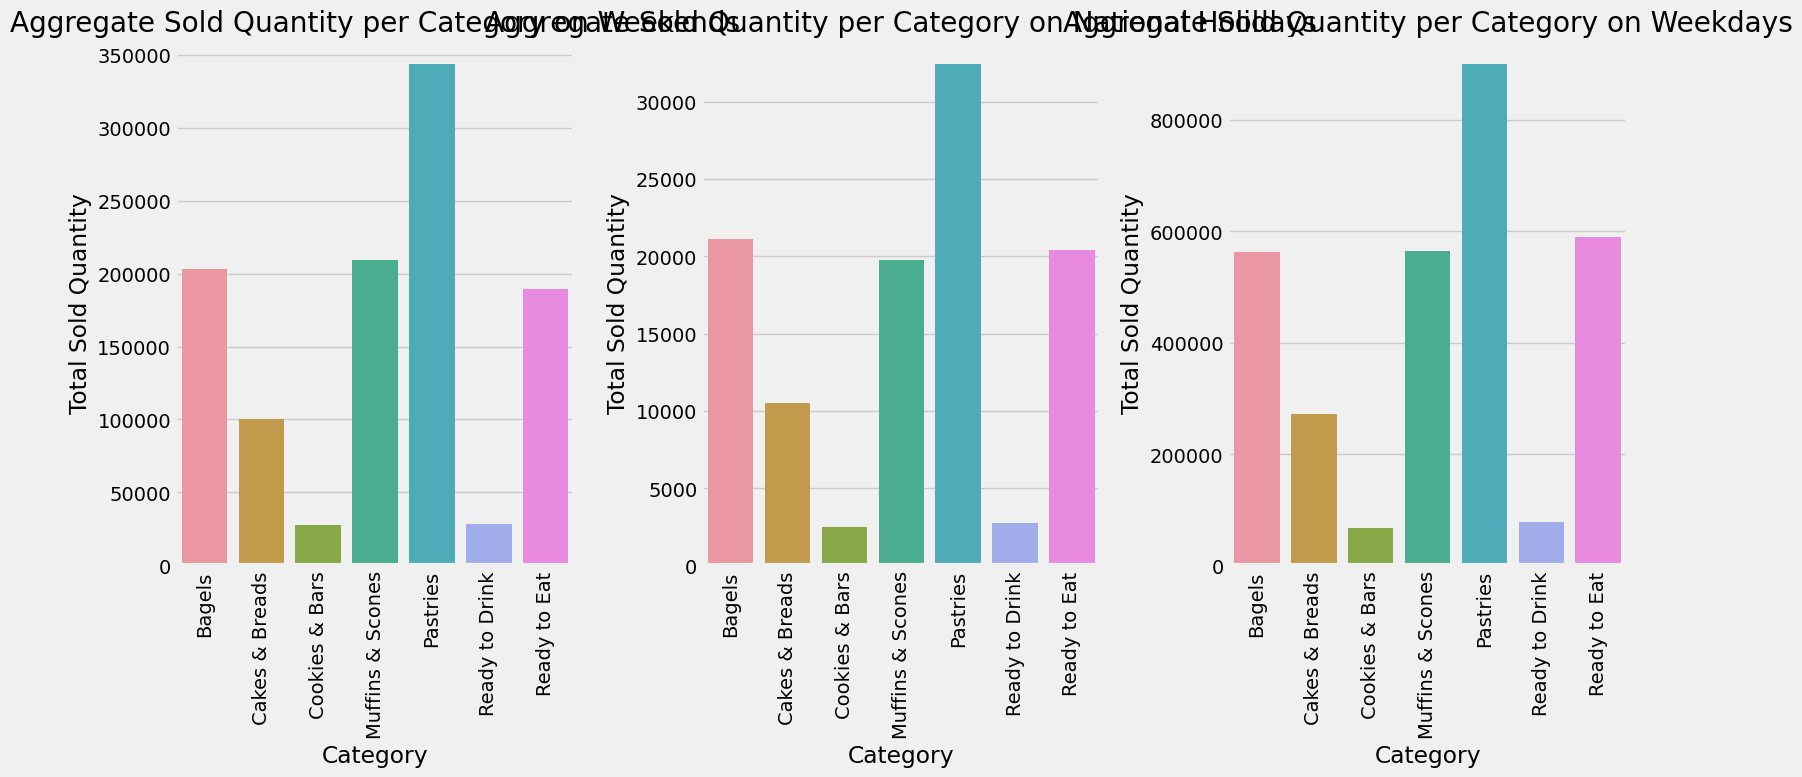

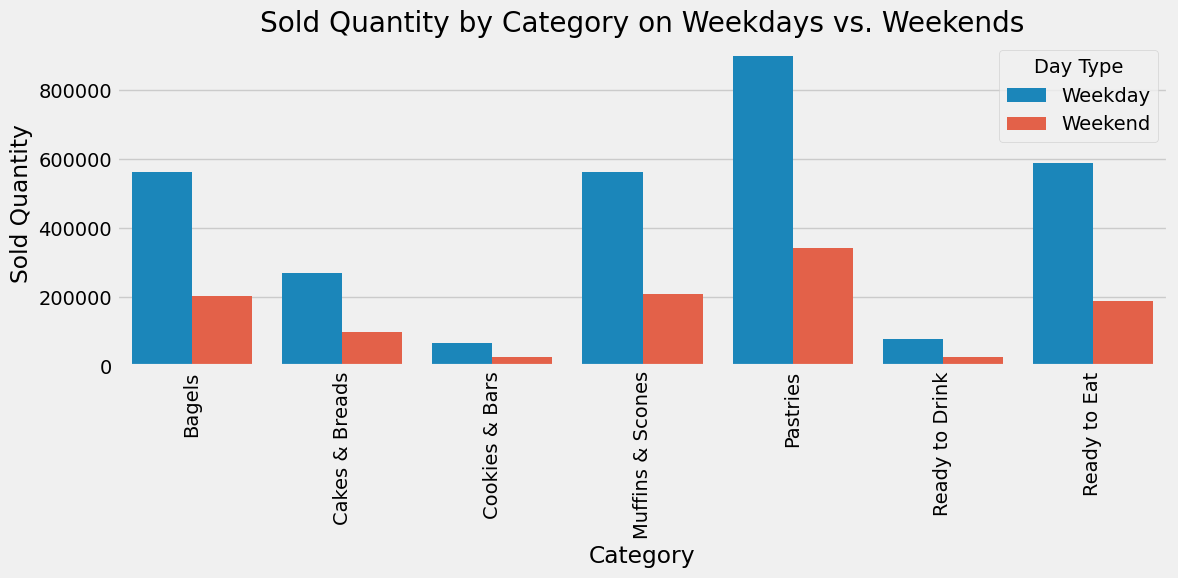

In [ ]:

weekend_sales_avg = df.groupby('is_weekend')['SoldQuantity'].mean()
print()
# Analyze the average 'SoldQuantity' on national holidays vs. non-holidays
holiday_sales_avg = df.groupby('is_national_holiday')['SoldQuantity'].mean()

print("Average Sold Quantity on Weekdays vs. Weekends:")
print(weekend_sales_avg)
print("\nAverage Sold Quantity on National Holidays vs. Non-holidays:")
print(holiday_sales_avg)
print ()

print ()
weekend_agg = df[df['is_weekend']].groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()
weekday_agg = df[~df['is_weekend']].groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()
holiday_agg = df[df['is_national_holiday']].groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()

# Plotting the graphs
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Graph for weekends
sns.barplot(ax=axes[0], x='CategoryLvl3Desc', y='SoldQuantity', data=weekend_agg)
axes[0].set_title('Aggregate Sold Quantity per Category on Weekends')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sold Quantity')

#Graph for weekday

sns.barplot(ax=axes[2], x='CategoryLvl3Desc', y='SoldQuantity', data=weekday_agg)
axes[2].set_title('Aggregate Sold Quantity per Category on Weekdays')
axes[2].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Total Sold Quantity')

# Graph for national holidays
sns.barplot(ax=axes[1], x='CategoryLvl3Desc', y='SoldQuantity', data=holiday_agg)
axes[1].set_title('Aggregate Sold Quantity per Category on National Holidays')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Total Sold Quantity')

plt.tight_layout()
plt.show()
print()
print()
category_sales = df.groupby(['CategoryLvl3Desc', 'is_weekend'])['SoldQuantity'].sum().unstack().reset_index()

# Rename the columns for better readability
category_sales.columns = ['CategoryLvl3Desc', 'Weekday', 'Weekend']

# Melt the DataFrame to have 'Day Type' as a variable
category_sales_melted = pd.melt(category_sales, id_vars='CategoryLvl3Desc', var_name='Day Type', value_name='SoldQuantity')

# Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales_melted, x='CategoryLvl3Desc', y='SoldQuantity', hue='Day Type')
plt.title('Sold Quantity by Category on Weekdays vs. Weekends')
plt.xlabel('Category')
plt.ylabel('Sold Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Day Type')
plt.show()

# **Investigating**
- # a. Impact of day of the week on sales and stocks (7 days)
- # b. Monthly changes and patterns (for the duration of the data)

# In the subsequent code cells we have graphically shown how the product sales and inventory waste change.

# The below graph suggests:
- # We can see the monday are the lowest and waste is more
- # As we gradually moving in the week we see a growth in the sales
- # Weekends have a rush

# **Improvements :**
# - 1. Less stock must be stocked in the start of week than friday and saturday.
# - 2. On Mondays the stores can have a offers to increase the footfall which would result in better sales
# - 3. Stores should implement a more dynamic inventory management system to minimize the wastage

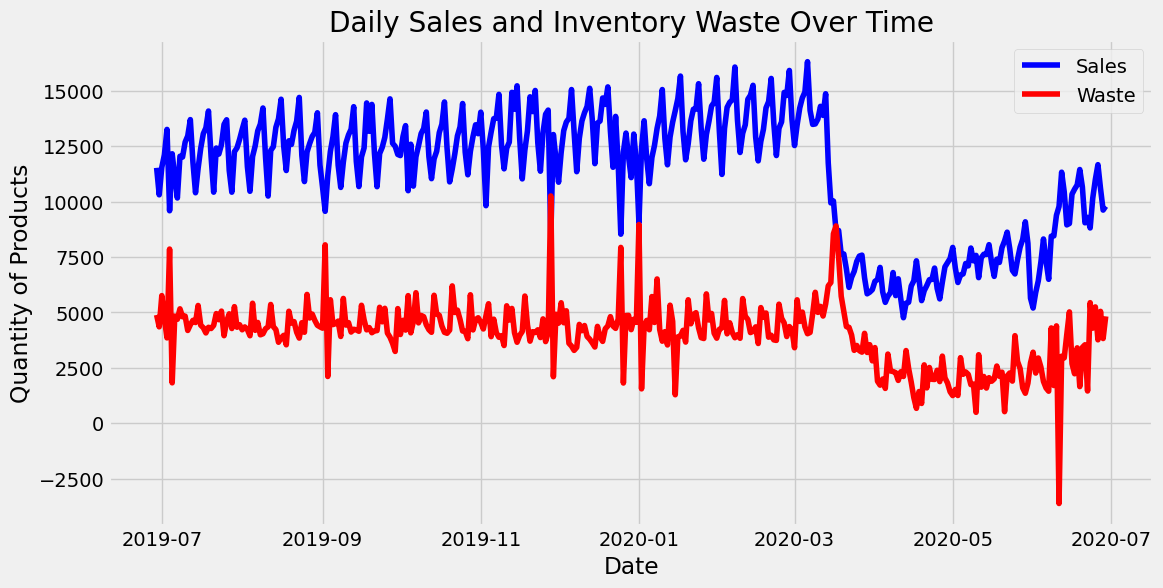

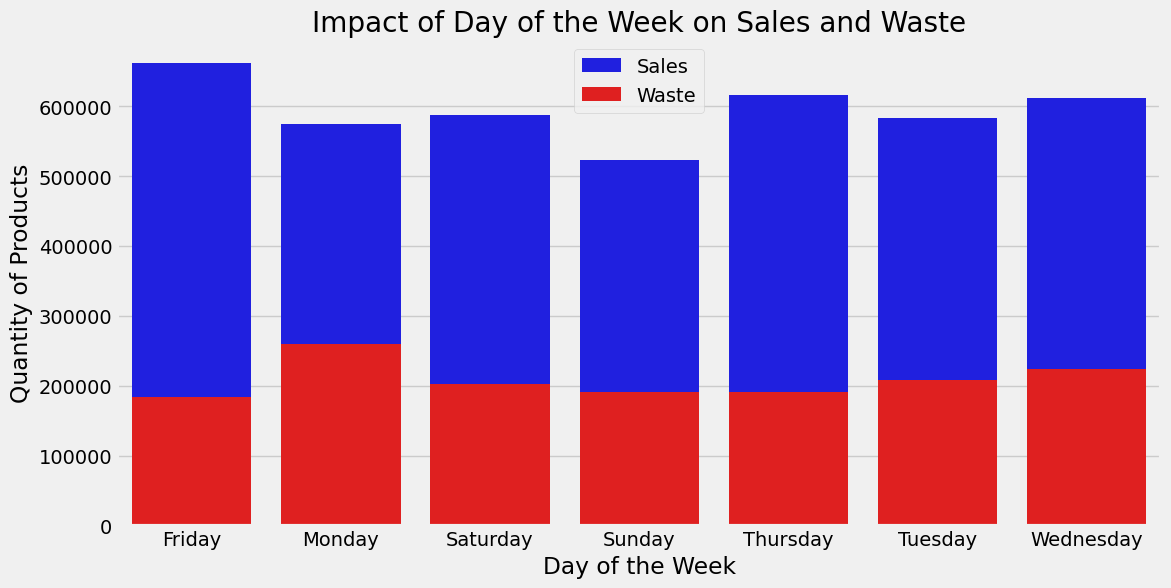

In [ ]:
# Load coffee store data
coffee_data = pd.read_csv('Coffee_Stores_Data.csv')

# Convert 'BusinessDate' to datetime type
coffee_data['BusinessDate'] = pd.to_datetime(coffee_data['BusinessDate'])

# Calculate daily waste (unsold items)
coffee_data['Waste'] = coffee_data['ReceivedQuantity'] - coffee_data['SoldQuantity']

# Aggregate sales and waste by date
daily_sales_waste = coffee_data.groupby('BusinessDate').agg({'SoldQuantity': 'sum', 'Waste': 'sum'}).reset_index()

# Plotting Sales and Waste over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_waste['BusinessDate'], daily_sales_waste['SoldQuantity'], label='Sales', color='blue')
plt.plot(daily_sales_waste['BusinessDate'], daily_sales_waste['Waste'], label='Waste', color='red')
plt.xlabel('Date')
plt.ylabel('Quantity of Products')
plt.title('Daily Sales and Inventory Waste Over Time')
plt.legend()
plt.show()

# Analyze the impact of day of the week
coffee_data['Weekday'] = coffee_data['BusinessDate'].dt.day_name()
weekday_sales_waste = coffee_data.groupby('Weekday').agg({'SoldQuantity': 'sum', 'Waste': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Weekday', y='SoldQuantity', data=weekday_sales_waste, color='blue', label='Sales')
sns.barplot(x='Weekday', y='Waste', data=weekday_sales_waste, color='red', label='Waste')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity of Products')
plt.title('Impact of Day of the Week on Sales and Waste')
plt.legend()
plt.show()

## **Exploring Product Sales Over the Last Two Years**
## The code below generates a bar plot to visualize the aggregated sold quantity for each product over the last two years (2019 and 2020). Additionally, it annotates the bar plot with the exact sold quantity on top of each bar.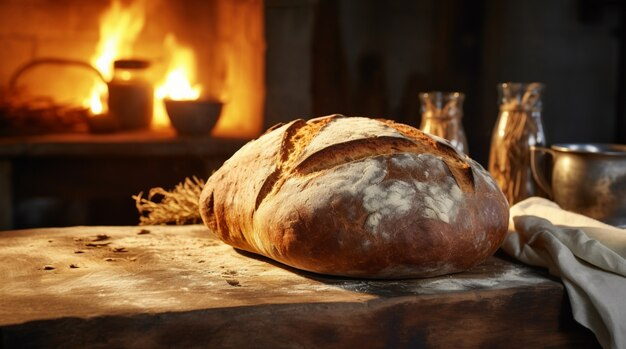

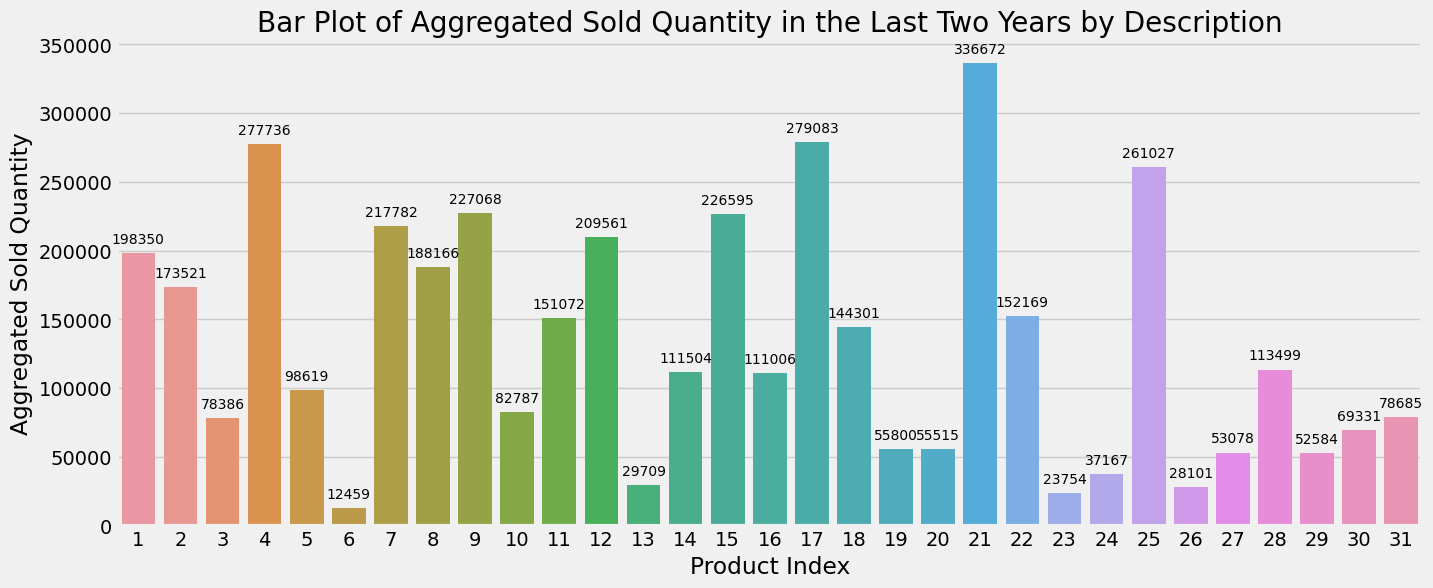

 Product Index                         Product Description  Aggregated Sold Quantity
             1                            Almond Croissant                  198350.0
             2                             Blueberry Scone                  173521.0
             3          Breakfast Burrito Egg Beans & Rice                   78386.0
             4                            Butter Croissant                  277736.0
             5                            Caprese Sandwich                   98619.0
             6                            Caramel Cake Pop                   12459.0
             7                         Chocolate Croissant                  217782.0
             8                               Cinnamon Roll                  188166.0
             9                   Coffee Cake with Streusel                  227068.0
            10                    Cookie - Chocolate Chunk                   82787.0
            11          Croissant - White Cheddar Jalapeno       

In [ ]:
# Set a larger plot size
plt.figure(figsize=(15, 6))

# Set the last two years
last_two_years = [2019, 2020]

# Filter the DataFrame for the last two years
filtered_df = df[df['Year'].isin(last_two_years)]

# Group and aggregate SoldQuantity by Description
agg_df = filtered_df.groupby('Description')['SoldQuantity'].sum().reset_index()

# Create a bar plot using Seaborn
ax = sns.barplot(x='Description', y='SoldQuantity', data=agg_df)

# Add y-values on top of the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Set x-axis labels as numeric values (1, 2, ...)
numeric_labels = range(1, len(agg_df) + 1)
plt.xticks(range(len(agg_df)), numeric_labels)

# Create a dictionary to store the mapping of index to product description
index_description_mapping = dict(zip(numeric_labels, agg_df['Description']))

# Set plot title and axis labels
plt.title('Bar Plot of Aggregated Sold Quantity in the Last Two Years by Description')
plt.xlabel('Product Index')
plt.ylabel('Aggregated Sold Quantity')

# Show the plot
plt.show()

# Create a DataFrame from the dictionary
mapping_df = pd.DataFrame(list(index_description_mapping.items()), columns=['Product Index', 'Product Description'])

# Add Aggregated Sold Quantity to the DataFrame
mapping_df['Aggregated Sold Quantity'] = agg_df['SoldQuantity'].tolist()

# Print the DataFrame with index set to False
print(mapping_df.to_string(index=False))


In [ ]:
# Sort the aggregated DataFrame by 'SoldQuantity' in descending order
agg_df_sorted = agg_df.sort_values(by='SoldQuantity', ascending=False)

# Get the 'Description' with the highest total sold quantity
highest_sold_description = agg_df_sorted.iloc[0]['Description']

# Print the highest sold 'Description'
print(f"The Product with the highest total sold quantity is: {highest_sold_description}")


The Product with the highest total sold quantity is: Muffin - Blueberry Streusel


# The graph below gives us an insight over which product out of the 31 products has the highest sold quantity over the period of two years- which is 2019 and 2020 and we find out that **Blueberry Streussel** is the crowd favorite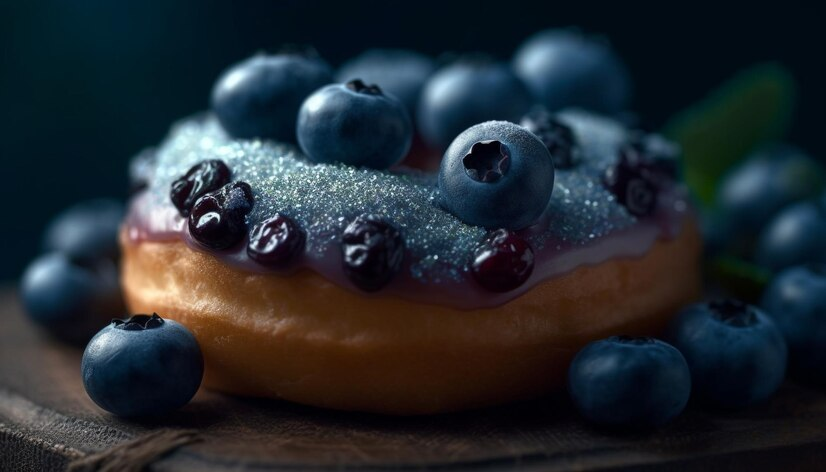

# **UNIVARIATE ANALYSIS**



# **Analysis of Baked and Cold Case Items**


## The bar plot below illustrates that **out of the total 31 products, 17 are freshly baked items, while the remaining 14 items fall under the category of cold case items.** This division indicates a potential distinction in shelf-life, with freshly baked items generally having a shorter shelf-life compared to cold case items.

## This observation leads to the need for a more detailed analysis of the sales of these products, taking into consideration various factors for each category.

## Factors to Consider for Analysis:

## 1. **Shelf-life and Restocking:**
###   - Freshly baked items have a limited shelf-life and may need to be discarded when nearing the expiry date or by the end of the day.
###   - Restocking strategies may differ between freshly baked and cold case items due to their distinct shelf-life characteristics.

## This insight highlights the importance of considering the unique characteristics of each product category when analyzing sales patterns and implementing inventory management strategies.



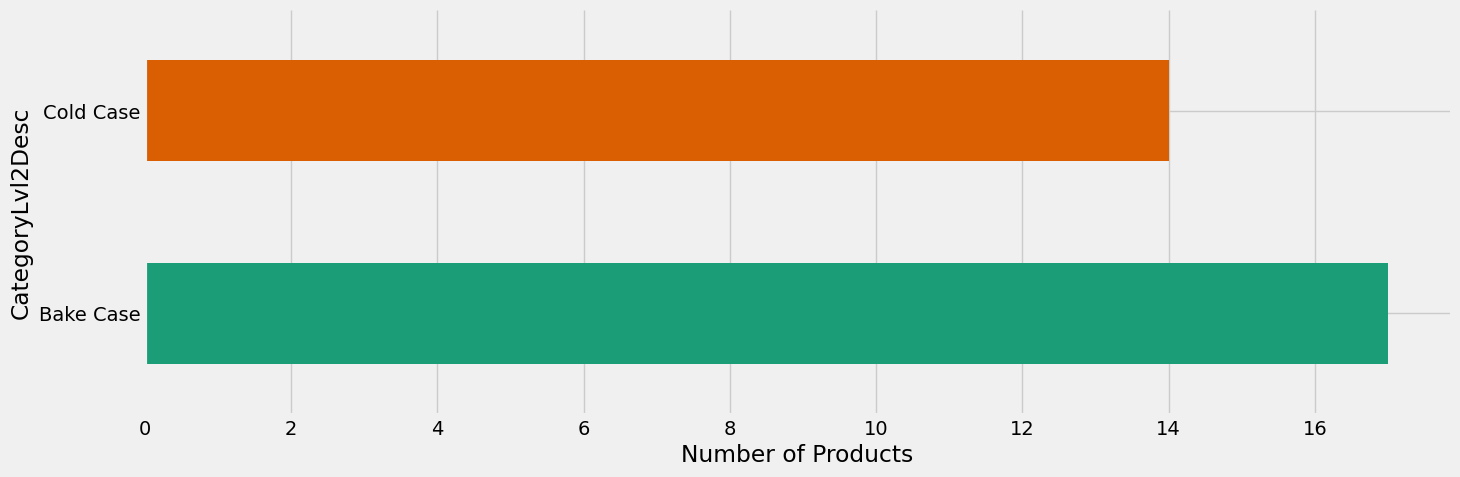

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group by 'CategoryLvl2Desc' and count the number of products in each category
product_count_by_category = plu_to_description_mapping.groupby('CategoryLvl2Desc').size()

# Plotting a horizontal bar chart
ax = product_count_by_category.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Set x-axis label
ax.set_xlabel('Number of Products')

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()



## **Product Distribution Analysis**

## The graph below provides insights into the distribution of the 31 products in the dataset:

- ##  **'Ready to Eat' Category:**
 - ##  - Among the 31 products, 12 belong to the 'Ready to Eat' category, forming the majority and constituting 38.7% of the total products.

## This observation extends to other categories, and the pie chart further illustrates the distribution of products based on 'CategoryLvl3Desc.' Each segment in the pie chart corresponds to a unique category, with the size of each segment being proportional to the number of products in that category. This visual representation offers a concise overview of how products are distributed across different category levels, facilitating a quick understanding of the dataset's composition.


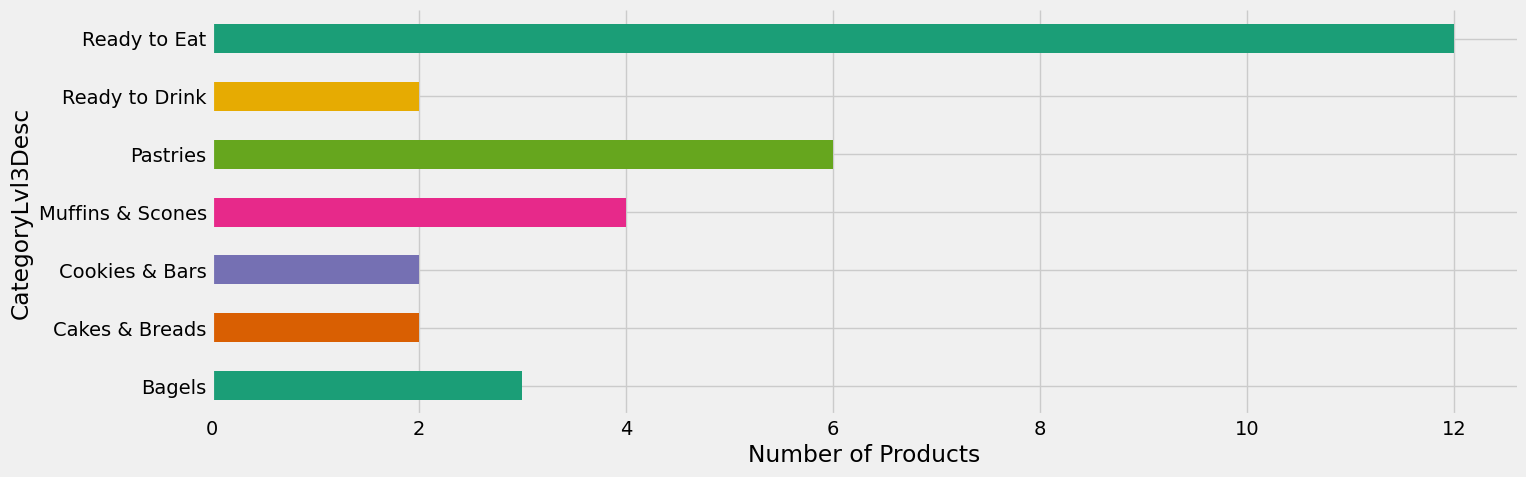

In [ ]:


# Group by 'CategoryLvl3Desc' and count the number of products in each category
product_count_by_category = plu_to_description_mapping.groupby('CategoryLvl3Desc').size()

# Plotting a horizontal bar chart
ax = product_count_by_category.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Set x-axis label
ax.set_xlabel('Number of Products')

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()


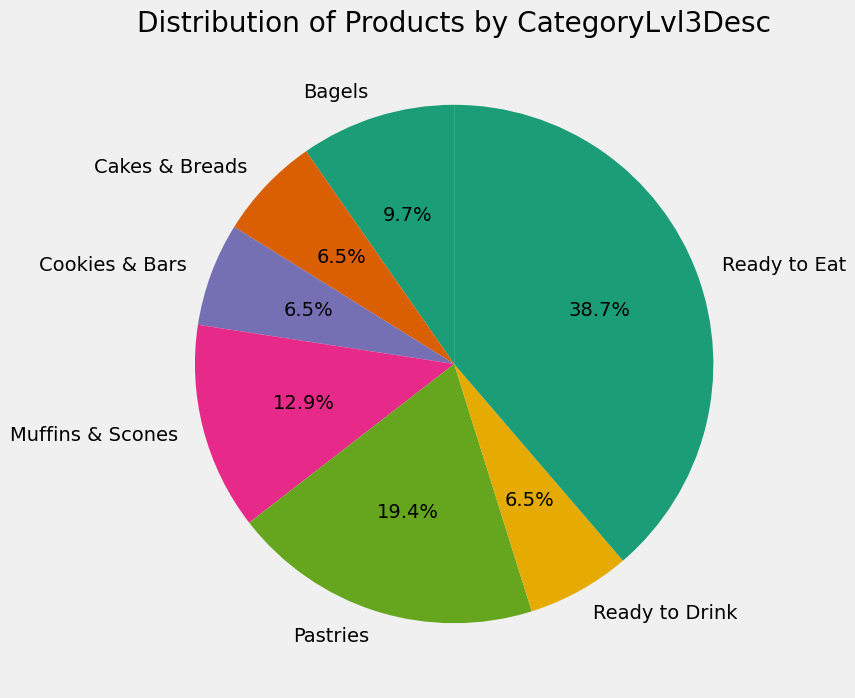

In [ ]:


# Group by 'CategoryLvl3Desc' and count the number of products in each category
product_count_by_category = plu_to_description_mapping.groupby('CategoryLvl3Desc').size()

# Plotting a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
product_count_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colors=sns.palettes.mpl_palette('Dark2'))

# Set plot title
plt.title('Distribution of Products by CategoryLvl3Desc')

# Show the plot
plt.show()




# **ANALYSIS OF THE SALES ON THE SEASONAL PRODUCTS**

# Seasonal Products Sales Trends Analysis

## This analysis and visualization provide valuable insights into the seasonal sales trends, shedding light on months with varying sales patterns for seasonal products over the specified years.

### Data Filtering:

## To focus on seasonal sales, the DataFrame (`df`) is filtered to include only entries related to seasonal products (`ItemType == 'Seasonal'`) during the years 2019 and 2020.

 ```python
# Code for Data Filtering
seasonal_df = df[(df['ItemType'] == 'Seasonal') & (df['Year'].isin([2019, 2020]))]




# Monthly Aggregation and Key Findings

## Monthly Aggregation:

### The filtered data is processed through monthly aggregation, where it is grouped by month. The total quantity of sold seasonal products is then calculated for each month using the following Python code:


```python
# Code for Monthly Aggregation
monthly_sales = seasonal_df.groupby(seasonal_df.index.month_name().str.slice(stop=3))['SoldQuantity'].sum().reset_index()

```

```



## This code creates a DataFrame (monthly_sales) representing the total quantity of sold seasonal products for each month, with months represented by their abbreviated names.
## **Key Findings**:

 - ## February Peak: Notably, February stands out as the peak month for the sale of 'Seasonal' products over the two-year period.

  
- ##  December Observation: Interestingly, no seasonal items were sold in December. This observation suggests a unique trend or the absence of specific seasonal products during that month.

## This detailed exploration significantly enhances our understanding of the seasonal sales dynamics. Such insights enable more informed decision-making for inventory management and marketing strategies.

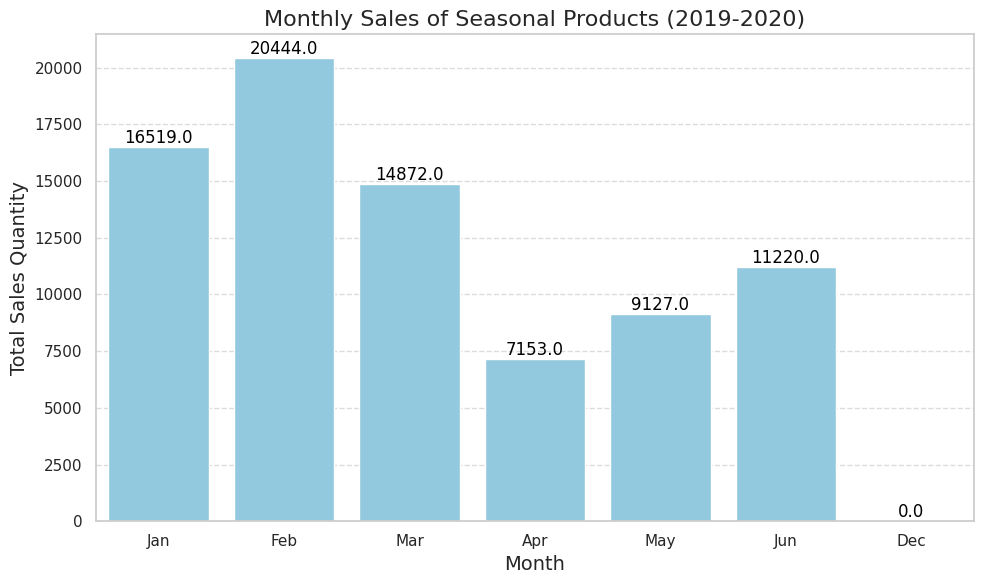

In [ ]:

#Analyzing seasonal products
# Filter the DataFrame for Seasonal products and the years 2019 and 2020
seasonal_df = df[(df['ItemType'] == 'Seasonal') & (df['Year'].isin([2019, 2020]))]

# Group and aggregate by month to get total sales for each month
monthly_sales = seasonal_df.groupby('Month')['SoldQuantity'].sum().reset_index()
# Map numerical month values to month names
monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: calendar.month_abbr[x])

# Set Seaborn style
sns.set(style='whitegrid')

# Plotting with enhanced aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='SoldQuantity', data=monthly_sales, color='skyblue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Quantity', fontsize=14)
plt.title('Monthly Sales of Seasonal Products (2019-2020)', fontsize=16)

# Add values on top of the bars
for index, value in enumerate(monthly_sales['SoldQuantity']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()










## But this is not so in the case of selling 'Core' products. We see that although no seasonal products were sold in december, **the highest selling month for core products was december.**
## Over the period of two years, **a whopping 323,154 items** were sold in the month of **december** (December 2019 and December 2020)

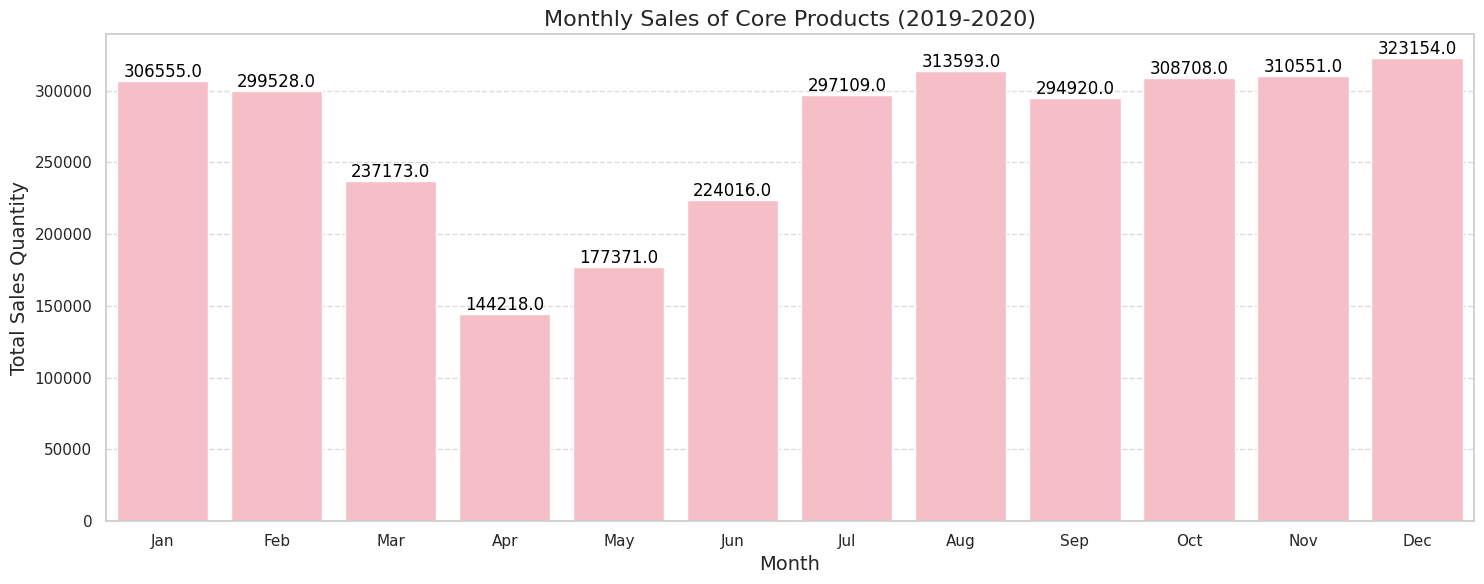

In [ ]:

#Analyzing Core products
# Filter the DataFrame for Seasonal products and the years 2019 and 2020
core_df = df[(df['ItemType'] == 'Core') & (df['Year'].isin([2019, 2020]))]

# Group and aggregate by month to get total sales for each month
monthly_sales = core_df.groupby('Month')['SoldQuantity'].sum().reset_index()
# Map numerical month values to month names
monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: calendar.month_abbr[x])

# Set Seaborn style
sns.set(style='whitegrid')

# Plotting with enhanced aesthetics
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='SoldQuantity', data=monthly_sales, color='lightpink')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Quantity', fontsize=14)
plt.title('Monthly Sales of Core Products (2019-2020)', fontsize=16)

# Add values on top of the bars
for index, value in enumerate(monthly_sales['SoldQuantity']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()










## On analyzing for '**Unassigned**' products, we see that that over the period of two years **January** has sold the highest products

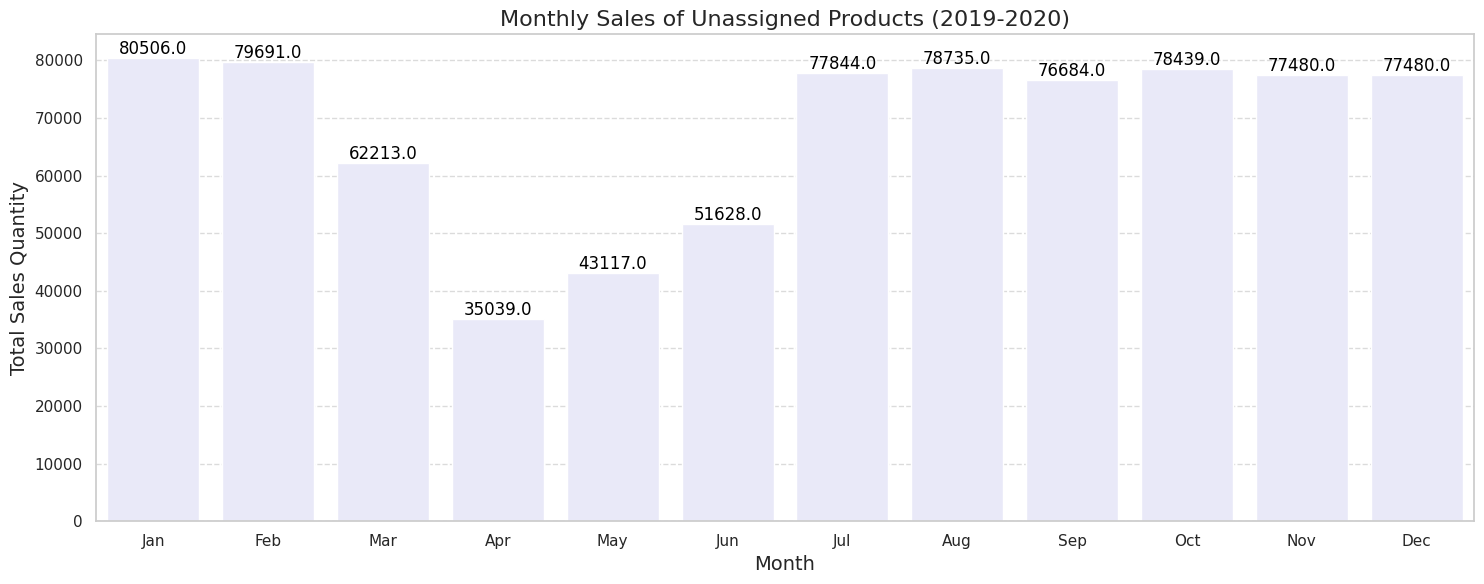

In [ ]:

#Analyzing Unassigned products
# Filter the DataFrame for Unassigned products and the years 2019 and 2020
unassigned_df = df[(df['ItemType'] == 'Unassigned') & (df['Year'].isin([2019, 2020]))]

# Group and aggregate by month to get total sales for each month
monthly_sales = unassigned_df.groupby('Month')['SoldQuantity'].sum().reset_index()
# Map numerical month values to month names
monthly_sales['Month'] = monthly_sales['Month'].apply(lambda x: calendar.month_abbr[x])

# Set Seaborn style
sns.set(style='whitegrid')

# Plotting with enhanced aesthetics
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='SoldQuantity', data=monthly_sales, color='lavender')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales Quantity', fontsize=14)
plt.title('Monthly Sales of Unassigned Products (2019-2020)', fontsize=16)

# Add values on top of the bars
for index, value in enumerate(monthly_sales['SoldQuantity']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Another interesting bservation is that over the period of two years more than **1.2 million products sold** by the stores is from the '***Pastries***' food category

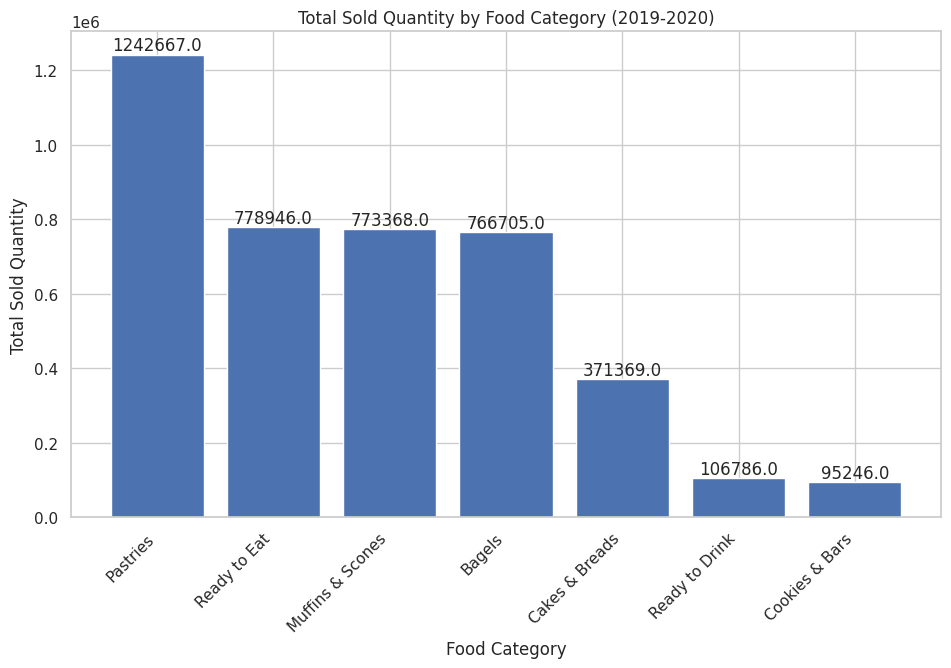

In [ ]:
#Finding out the highest CategoryLvl3Desc Category sold in 2019-2020

# Group by 'level3cat' and sum the 'SoldQuantity'
grouped_df = df.groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()

# Sort the DataFrame by 'SoldQuantity' in descending order
grouped_df = grouped_df.sort_values(by='SoldQuantity', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['CategoryLvl3Desc'], grouped_df['SoldQuantity'])
plt.xlabel('Food Category')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quantity by Food Category (2019-2020)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add y-values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


# **Sales Analysis by Season**
# We have done an in-depth analysis of the Sales of the various food categories based on seasons and we found out that **throughout all the seasons** - Spring, Summer, Autumn and winter, **Pastries were the best selling category**

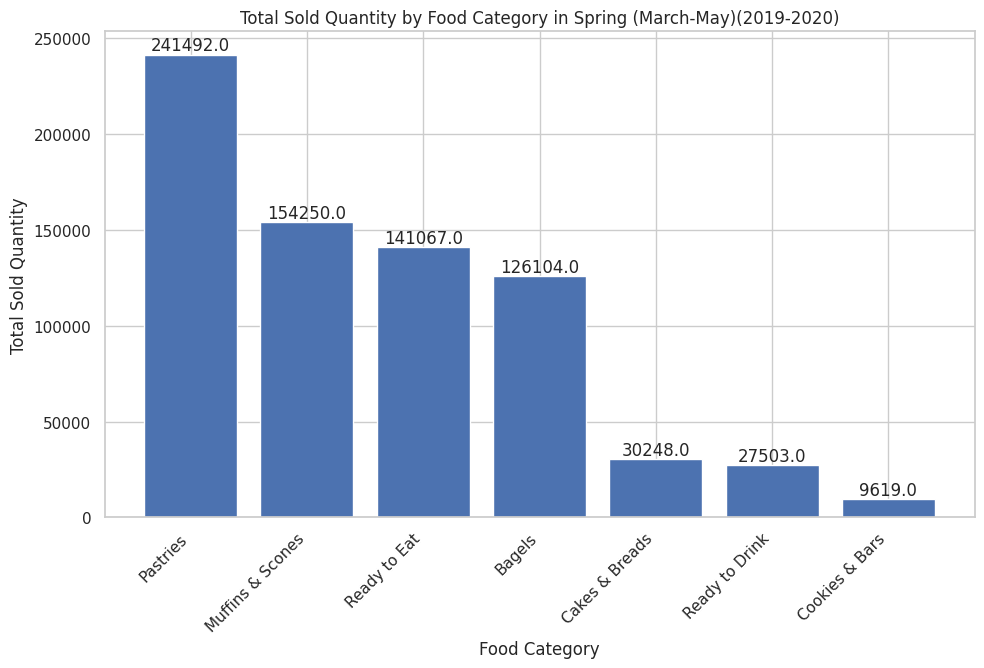

In [ ]:
spring_df = df.loc[(df['Month'] >= 3) & (df['Month'] <= 5)]
#Finding out the highest CategoryLvl3Desc Category sold in 2019-2020

# Group by 'level3cat' and sum the 'SoldQuantity'
grouped_df = spring_df.groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()

# Sort the DataFrame by 'SoldQuantity' in descending order
grouped_df = grouped_df.sort_values(by='SoldQuantity', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['CategoryLvl3Desc'], grouped_df['SoldQuantity'])
plt.xlabel('Food Category')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quantity by Food Category in Spring (March-May)(2019-2020)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add y-values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


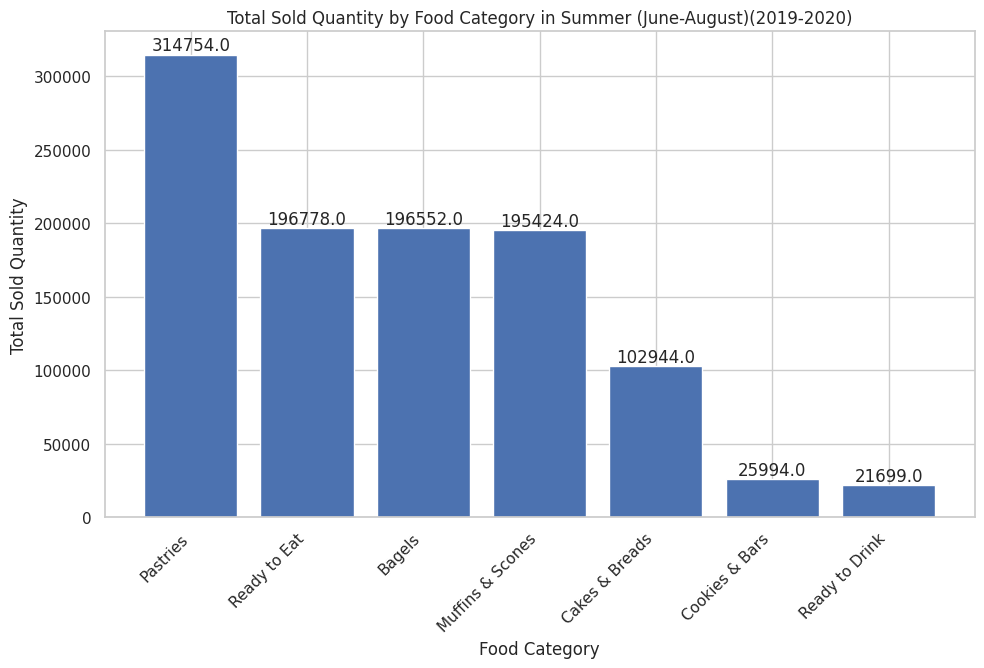

In [ ]:
summer_df = df.loc[(df['Month'] >= 6) & (df['Month'] <= 8)]
#Finding out the highest CategoryLvl3Desc Category sold in 2019-2020

# Group by 'level3cat' and sum the 'SoldQuantity'
grouped_df = summer_df.groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()

# Sort the DataFrame by 'SoldQuantity' in descending order
grouped_df = grouped_df.sort_values(by='SoldQuantity', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['CategoryLvl3Desc'], grouped_df['SoldQuantity'])
plt.xlabel('Food Category')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quantity by Food Category in Summer (June-August)(2019-2020)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add y-values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


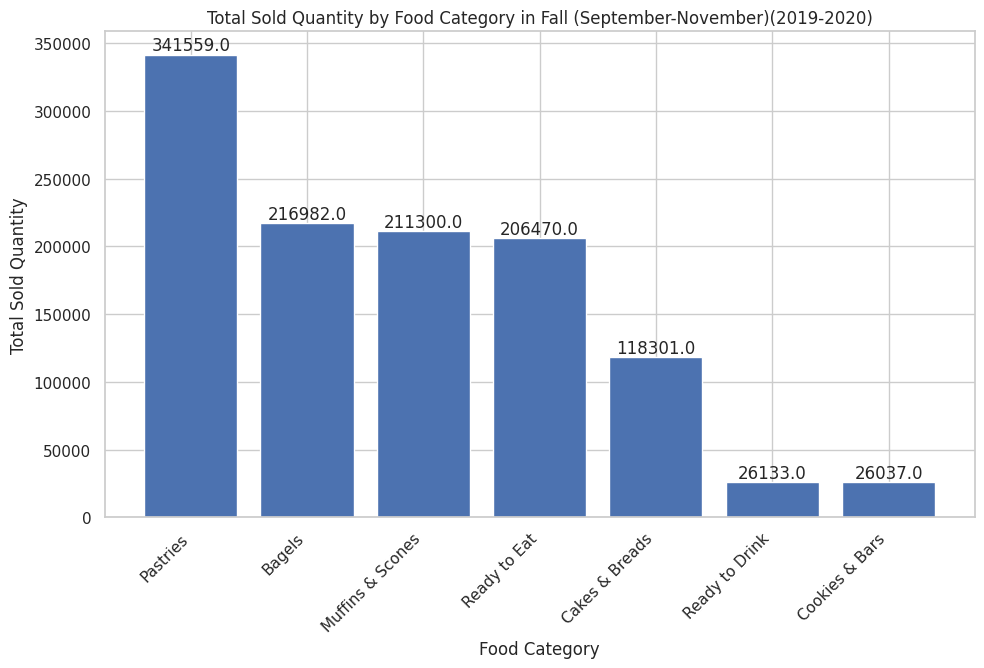

In [ ]:
fall_df = df.loc[(df['Month'] >= 9) & (df['Month'] <= 11)]
#Finding out the highest CategoryLvl3Desc Category sold in 2019-2020

# Group by 'level3cat' and sum the 'SoldQuantity'
grouped_df = fall_df.groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()

# Sort the DataFrame by 'SoldQuantity' in descending order
grouped_df = grouped_df.sort_values(by='SoldQuantity', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['CategoryLvl3Desc'], grouped_df['SoldQuantity'])
plt.xlabel('Food Category')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quantity by Food Category in Fall (September-November)(2019-2020)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add y-values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


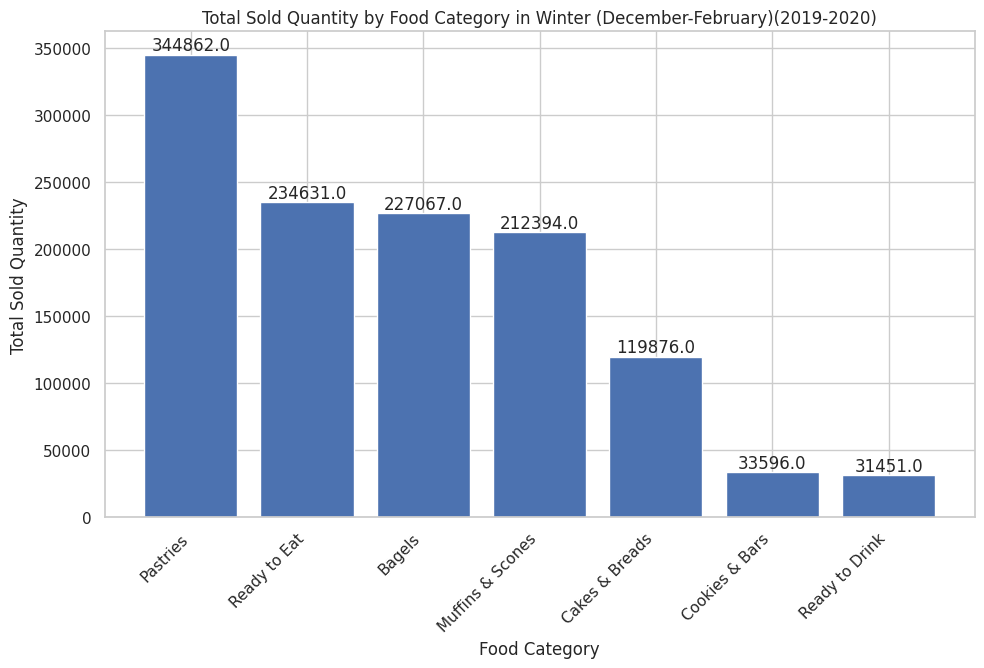

In [ ]:
winter_df = df.loc[(df['Month'] >= 12) | (df['Month'] <= 2)]
#Finding out the highest CategoryLvl3Desc Category sold in 2019-2020

# Group by 'level3cat' and sum the 'SoldQuantity'
grouped_df = winter_df.groupby('CategoryLvl3Desc')['SoldQuantity'].sum().reset_index()

# Sort the DataFrame by 'SoldQuantity' in descending order
grouped_df = grouped_df.sort_values(by='SoldQuantity', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_df['CategoryLvl3Desc'], grouped_df['SoldQuantity'])
plt.xlabel('Food Category')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quantity by Food Category in Winter (December-February)(2019-2020)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add y-values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


# **During the winter moths, we see that baked goods are high in demand compared to cold case items as shown in the graph below**

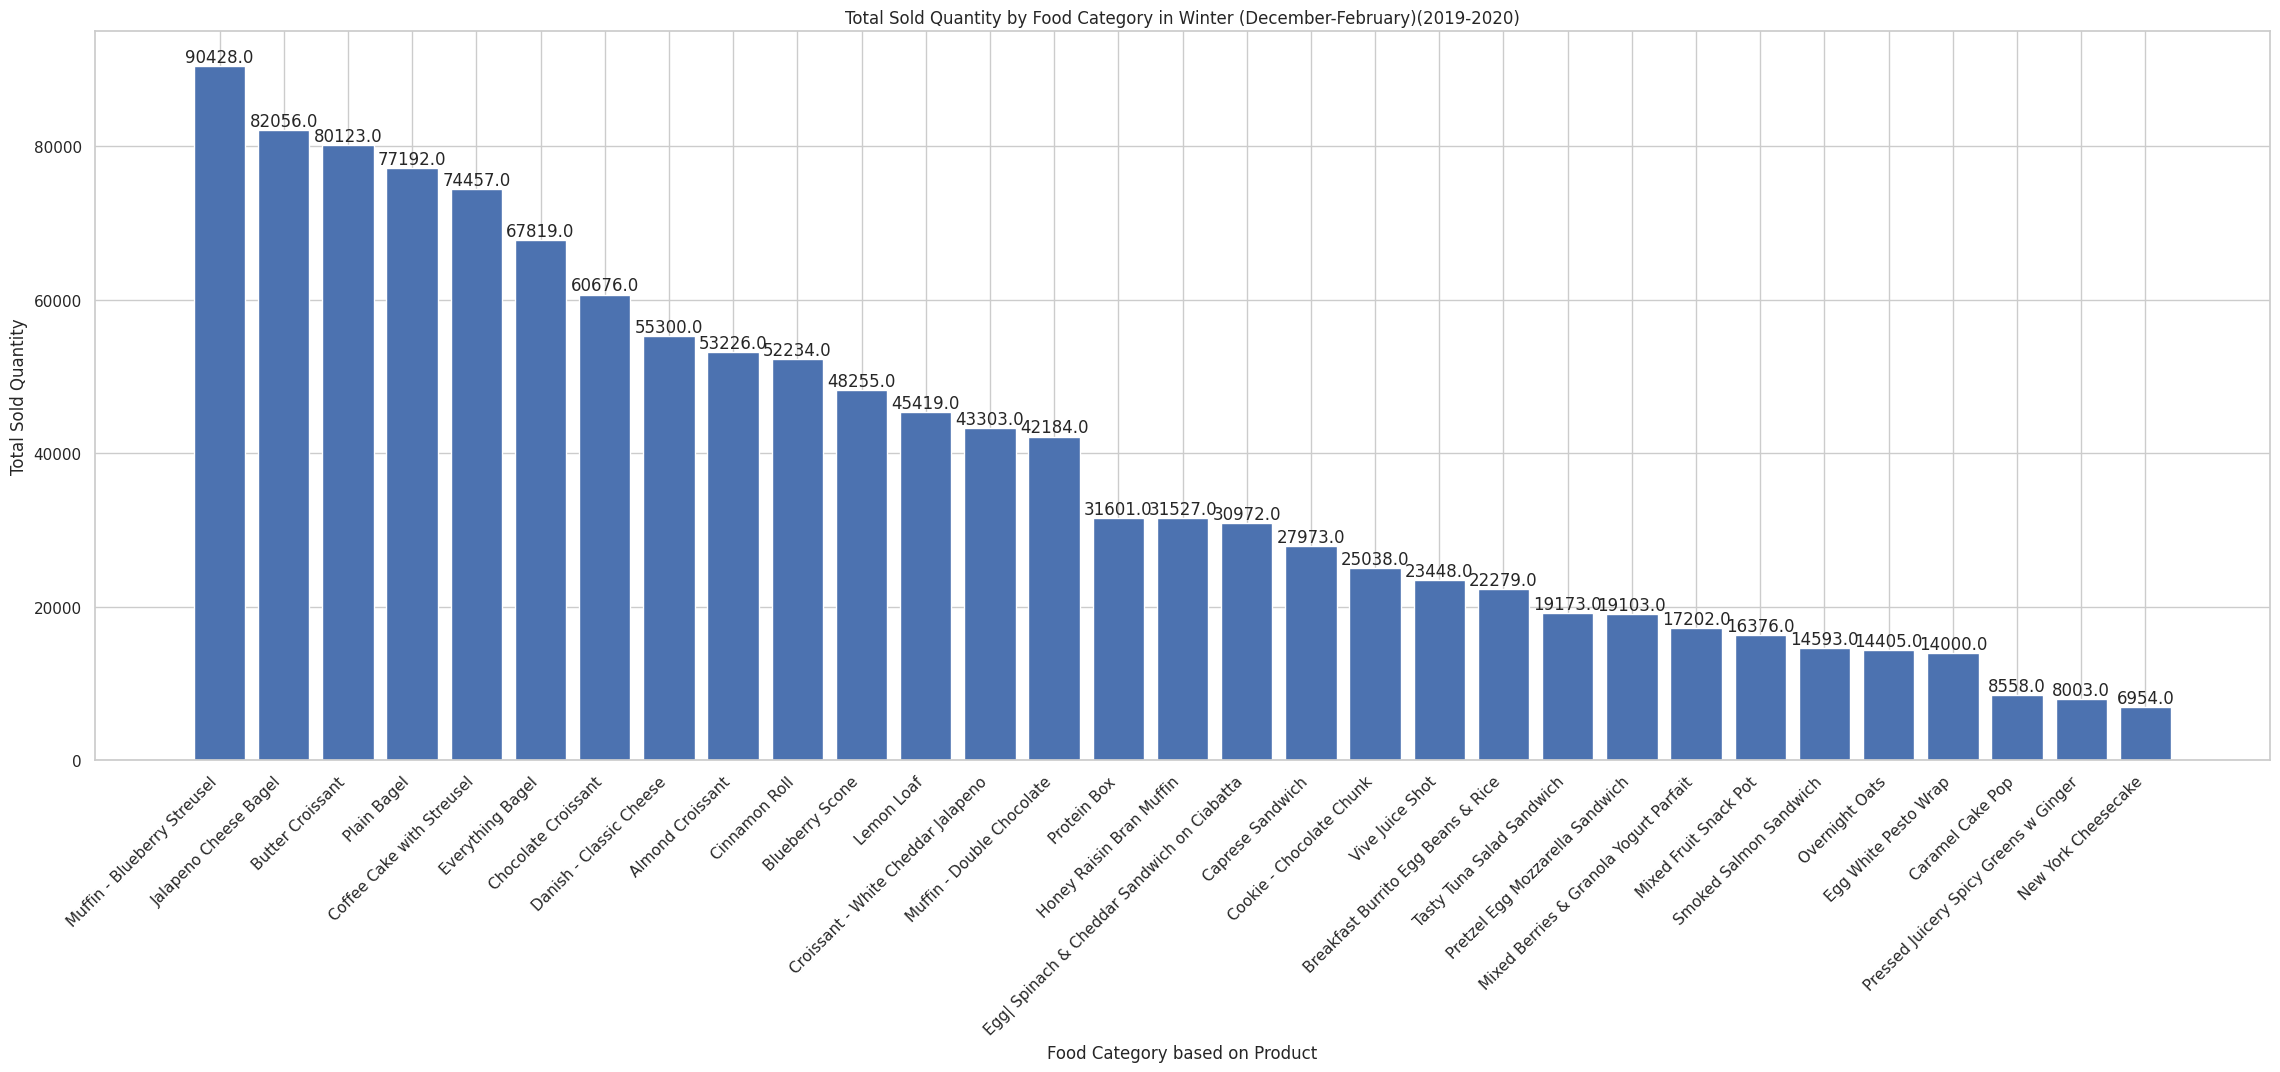

In [ ]:
winter_df = df.loc[(df['Month'] >= 12) | (df['Month'] <= 2)]
#Finding out the highest CategoryLvl3Desc Category sold in 2019-2020

# Group by 'level3cat' and sum the 'SoldQuantity'
grouped_df = winter_df.groupby('Description')['SoldQuantity'].sum().reset_index()

# Sort the DataFrame by 'SoldQuantity' in descending order
grouped_df = grouped_df.sort_values(by='SoldQuantity', ascending=False)

# Plot the data
plt.figure(figsize=(25, 9))
bars = plt.bar(grouped_df['Description'], grouped_df['SoldQuantity'])
plt.xlabel('Food Category based on Product')
plt.ylabel('Total Sold Quantity')
plt.title('Total Sold Quantity by Food Category in Winter (December-February)(2019-2020)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add y-values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()


#**Sales Analysis by Grouping of Store**
- ## We find that the stores sales have gone up in the later part of the year from July - 2019 through December 2019. In the year 2020, the store sales for the first quarter of the year are promising, but they decline towards the second quarter of the year.
- ## In the graph plotted below we plot the sales pattern of the top 10 stores. But we have 131 stores and plotting all these stores on a single line graph will be cluttered and messy. So in the next text cell, we discuss another method to get more detailed analysis of the sales pattern of the stores

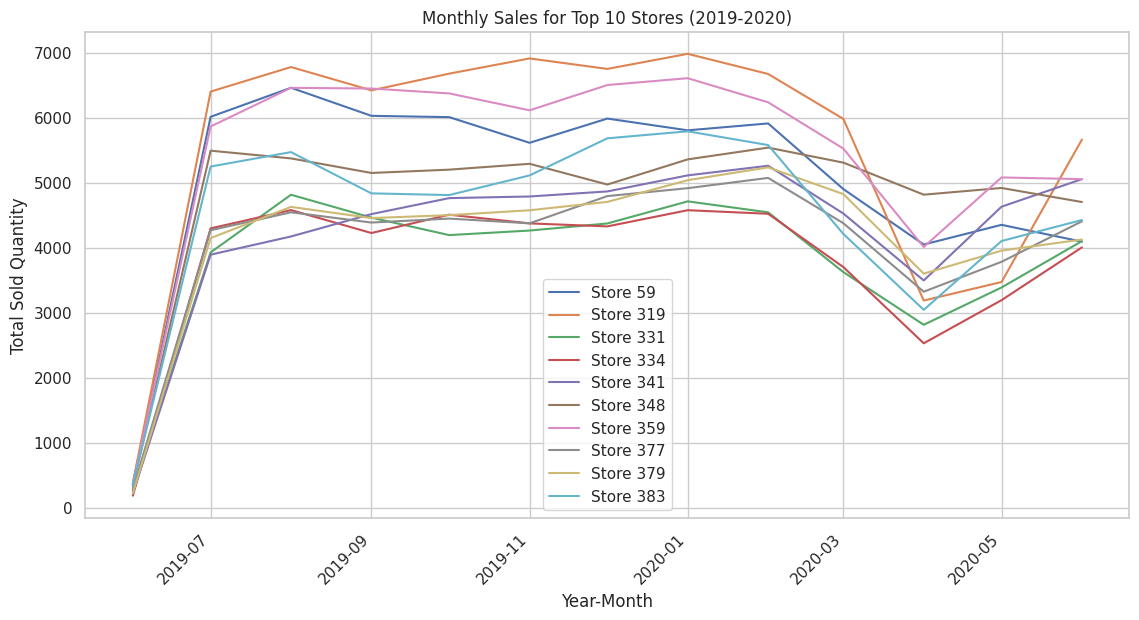

In [ ]:
# Filter data for the period of 2019 and 2020
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
df_2019_2020 = df[(df['YearMonth'] >= '2019-01') & (df['YearMonth'] <= '2020-12')]

grouped_df = df_2019_2020.groupby(['StoreID', 'YearMonth'])['SoldQuantity'].sum().reset_index()

# Determine the top N stores based on total sales
top_n_stores = grouped_df.groupby('StoreID')['SoldQuantity'].sum().nlargest(10).index

# Filter the DataFrame for the top N stores
top_n_df = grouped_df[grouped_df['StoreID'].isin(top_n_stores)]

# Plot the data
plt.figure(figsize=(12, 6))
for store_id, group in top_n_df.groupby('StoreID'):
    plt.plot(group['YearMonth'], group['SoldQuantity'], label=f'Store {store_id}')

plt.xlabel('Year-Month')
plt.ylabel('Total Sold Quantity')
plt.title('Monthly Sales for Top 10 Stores (2019-2020)')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()



## We have grouped the 131 stores into 5 groups based on the group_id attribute. According to the data provided, we have no knowledge on what `group_id` represents, but we made a few assumptions:
- ## Certain stores are grouped together based on a region in the United States. We don't exactly know which group of stores belong to which region, but for the sake of understanding, we have made this assumption.
- ## We see that Group 5 has outperformed the other groups by a lot.
##Our reasons:
 - ##  Maybe the stores in this grpoup belong in **developed urban cities** where there is a huge population to attract such sales.

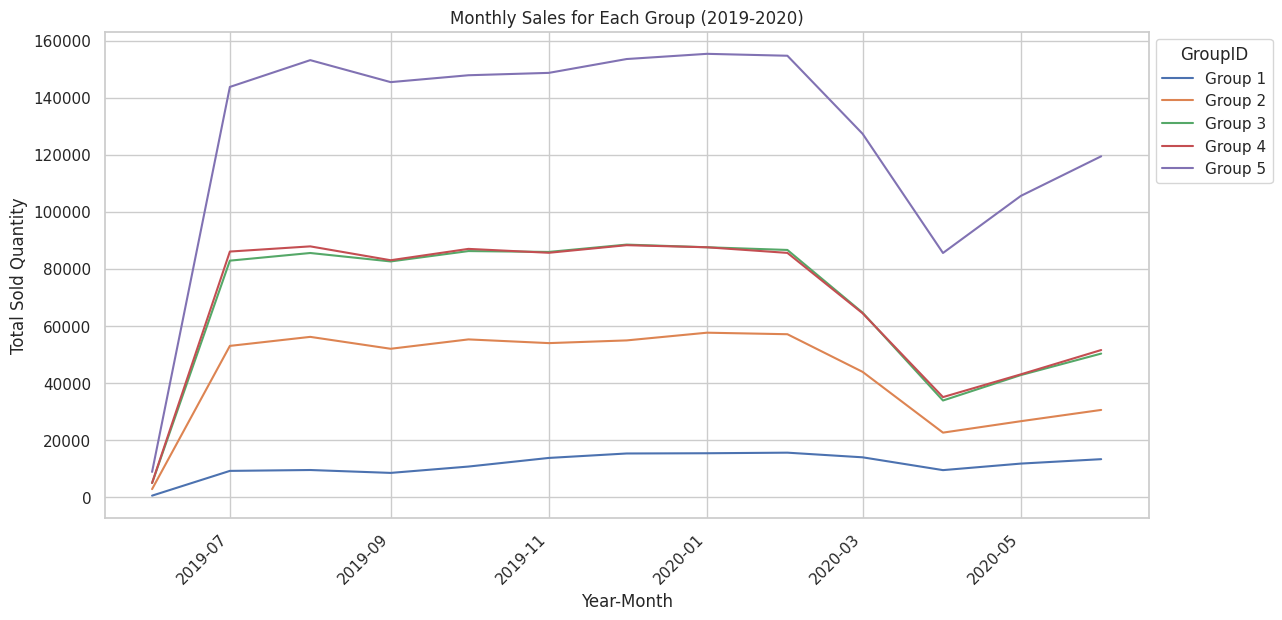

In [ ]:

# Assuming df has columns 'StoreID', 'SoldQuantity', 'Year', 'Month', and 'GroupID'
# df = pd.read_csv('your_dataset.csv')

# Filter data for the period of 2019 and 2020
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')

df_2019_2020 = df[(df['YearMonth'] >= '2019-01') & (df['YearMonth'] <= '2020-12')]

# Group by 'GroupID', 'YearMonth' and sum the 'SoldQuantity'
grouped_df = df_2019_2020.groupby(['GroupID', 'YearMonth'])['SoldQuantity'].sum().reset_index()

# Plot sales vs. month for each group
group_ids = grouped_df['GroupID'].unique()

plt.figure(figsize=(12, 6))

for group_id in group_ids:
    group_data = grouped_df[grouped_df['GroupID'] == group_id]
    plt.plot(group_data['YearMonth'], group_data['SoldQuantity'], label=f'Group {int(group_id)}')

plt.xlabel('Year-Month')
plt.ylabel('Total Sold Quantity')
plt.title('Monthly Sales for Each Group (2019-2020)')
plt.legend(title='GroupID', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


#**Identifying the stocking patterns**

#We derived a new feature `leftover` as seen in the code snippet below:
```
df['leftover'] = df['ReceivedQuantity'] - df['SoldQuantity']
```
##**Inference:**
###1. More frequency in restocking of products implies that the products are in high demand as they are rapidly sold-out
###2. When the frequency of the leftover is high (w.r.t) ReceivedQuantity (as in the case of 'Ready to Drink' category), the products are not easily sold and are still left on shelves. This means that for such products, restocking is not frequently necessary
###3. In the case of 'Bagels' category, we observe that in the graph, the leftovers are not as much- this implies that the bagel category is in high demand by the customer. Hence, frequent restocking of these products is necessary as they increase sales
# **In conclusion: Frequent restocking of products means Increase in Sales of these products**



In [ ]:

# Create the 'leftover' feature
df['leftover'] = df['ReceivedQuantity'] - df['SoldQuantity']

# Set negative values to 0
df['leftover'] = np.where(df['leftover'] < 0, 0, df['leftover'])

# Display the DataFrame with the new 'leftover' feature
df.head()


,StoreID,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,...,GroupID,MissedSales,date_column,Month,Year,Weekday,is_weekend,is_national_holiday,YearMonth,leftover
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,...,2.0,0.000000,2019-06-29,6,2019,5,True,False,2019-06-01,0.0
2019-06-29,2,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,...,2.0,0.000000,2019-06-29,6,2019,5,True,False,2019-06-01,2.0
2019-06-29,2,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,...,2.0,0.000000,2019-06-29,6,2019,5,True,False,2019-06-01,0.0
2019-06-29,2,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,...,2.0,0.000000,2019-06-29,6,2019,5,True,False,2019-06-01,0.0
2019-06-29,2,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,...,2.0,0.578969,2019-06-29,6,2019,5,True,False,2019-06-01,0.0


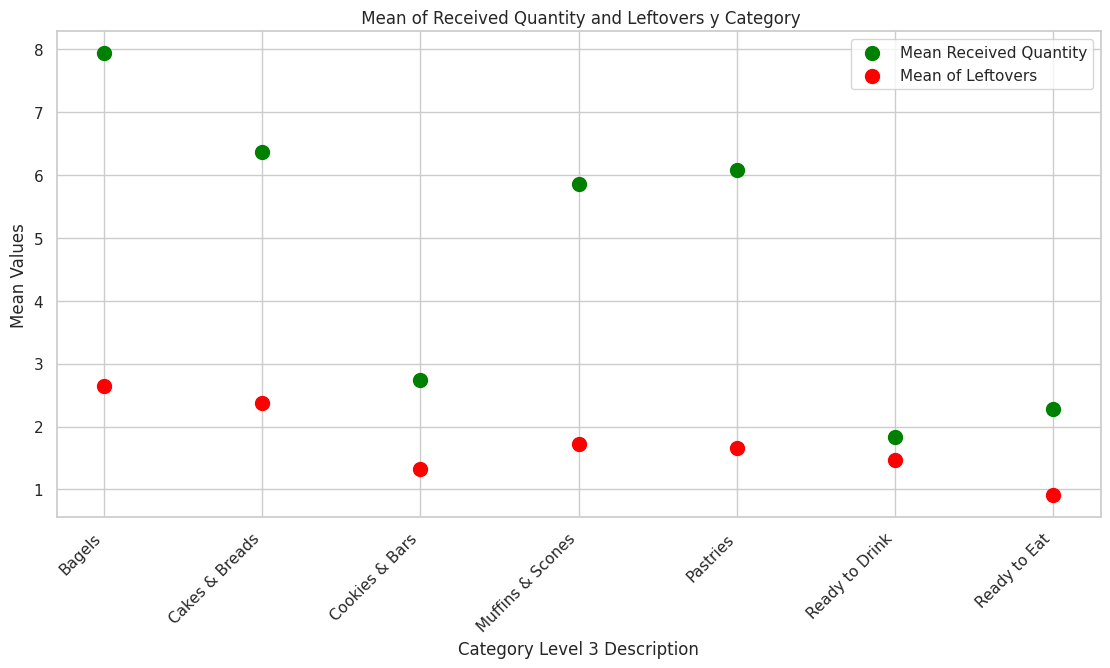

In [ ]:


# Assuming df has columns 'CategoryLvl3Desc', 'Received Quantity', and 'LatestOrder'
# df = pd.read_csv('your_dataset.csv')

# Group by 'CategoryLvl3Desc' and calculate mean, max, and latest order
grouped_df = df.groupby('CategoryLvl3Desc').agg({'ReceivedQuantity': ['mean'], 'leftover': ['mean']}).reset_index()
grouped_df.columns = ['CategoryLvl3Desc', 'Mean Received Quantity', 'Mean of Leftover']

# Plot the data
plt.figure(figsize=(12, 6))

# Plot mean values
plt.scatter(grouped_df['CategoryLvl3Desc'], grouped_df['Mean Received Quantity'], color='green',label='Mean Received Quantity', marker='o', s=100)



# Plot latest order values as points above the bars
plt.scatter(grouped_df['CategoryLvl3Desc'], grouped_df['Mean of Leftover'], color='red', label='Mean of Leftovers', marker='o', s=100)



plt.xlabel('Category Level 3 Description')
plt.ylabel('Mean Values')
plt.title(' Mean of Received Quantity and Leftovers y Category')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


#**Analysis of best and worst products based on their inventory management**

#The following code cell plots the top 25% and botton 25% of the best and worst products based on their inventory management

#In order to analyse, we derived a new feature ```InventoryEfficiency```

# by the code snippet provided below:

```
relevant_data['InventoryEfficiency'] = relevant_data['SoldQuantity'] / relevant_data['ReceivedQuantity']
```
# The intuition: The ratio of SoldQuantity to Received Quantity shows how best the inventory is managed.
# If the values of the ratio are above 0.6, then see that these categories fall under the top 25% best managed products
#Else, they fall under the botton 25% of the worst managed products

# **The values of the UNSOLD Inventory Cost is given below:**
# Top 25% Average Unsold Inventory Cost: 0.86
# Bottom 25% Average Unsold Inventory Cost: 2.28

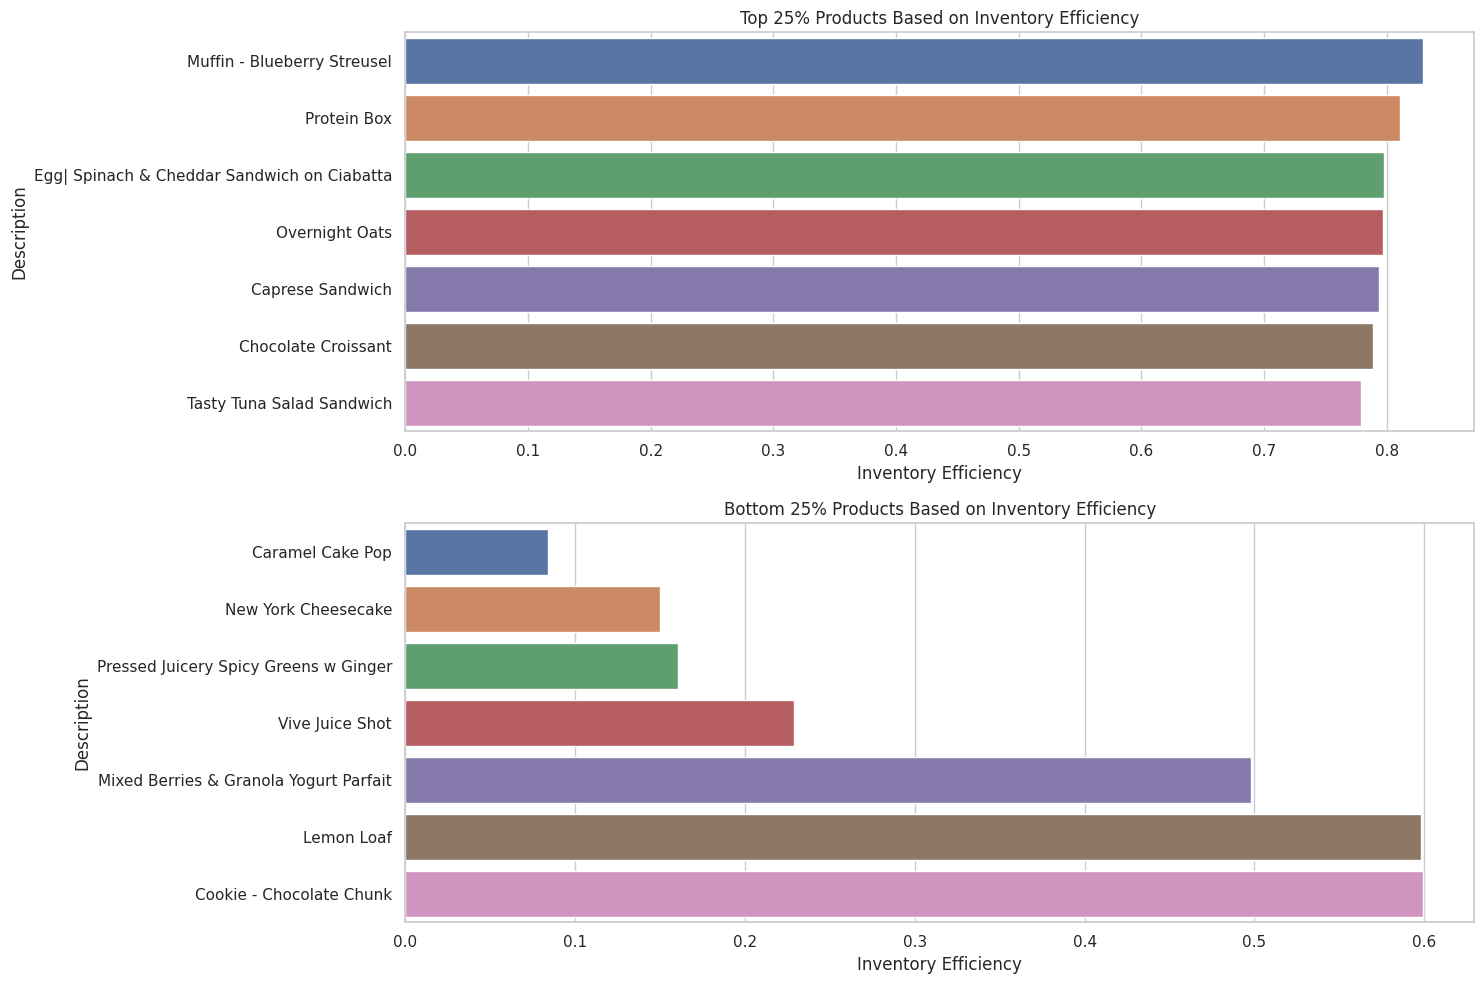

{'Top 25% Average Unsold Inventory Cost': 0.8583236920009666,
 'Bottom 25% Average Unsold Inventory Cost': 2.2793455611798907}

In [ ]:
data=df
relevant_data = data[['Description', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity']]

# Adding a column for the cost of unsold inventory
relevant_data['UnsoldInventoryCost'] = relevant_data['EndQuantity'] * 0.5

# Calculating inventory efficiency as the ratio of SoldQuantity to ReceivedQuantity
# Higher values indicate better inventory management (more sales per item received)
relevant_data['InventoryEfficiency'] = relevant_data['SoldQuantity'] / relevant_data['ReceivedQuantity']
relevant_data['InventoryEfficiency'] = relevant_data['InventoryEfficiency'].replace(np.inf, np.nan)  # Replace infinities with NaN

# Dropping rows with NaN values in InventoryEfficiency (occurs when ReceivedQuantity is 0)
relevant_data = relevant_data.dropna(subset=['InventoryEfficiency'])

# Calculating the mean Inventory Efficiency for each product
product_efficiency = relevant_data.groupby('Description')['InventoryEfficiency'].mean()

# Identifying the top 25% and bottom 25% products based on Inventory Efficiency
top_25_percent = product_efficiency.nlargest(int(len(product_efficiency) * 0.25))
bottom_25_percent = product_efficiency.nsmallest(int(len(product_efficiency) * 0.25))

# Plotting the top and bottom 25% products
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Top 25%
sns.barplot(x=top_25_percent.values, y=top_25_percent.index, ax=axes[0])
axes[0].set_title('Top 25% Products Based on Inventory Efficiency')
axes[0].set_xlabel('Inventory Efficiency')

# Bottom 25%
sns.barplot(x=bottom_25_percent.values, y=bottom_25_percent.index, ax=axes[1])
axes[1].set_title('Bottom 25% Products Based on Inventory Efficiency')
axes[1].set_xlabel('Inventory Efficiency')

plt.tight_layout()
plt.show()

# Insights into Data
# Calculating average unsold inventory cost for top and bottom products
top_avg_unsold_cost = relevant_data[relevant_data['Description'].isin(top_25_percent.index)]['UnsoldInventoryCost'].mean()
bottom_avg_unsold_cost = relevant_data[relevant_data['Description'].isin(bottom_25_percent.index)]['UnsoldInventoryCost'].mean()

# Insights
insights = {
    "Top 25% Average Unsold Inventory Cost": top_avg_unsold_cost,
    "Bottom 25% Average Unsold Inventory Cost": bottom_avg_unsold_cost
}

insights

#**Analysis of best and worst products based on the sales**

#An interesting observation can be made here:
# **The product which has the highest Inventory Management Efficiency, which in this case is Muffin- Blueberry Streusel is also the highest Sold Product**
# **AND**
# **The product which has the Least Inventory Management Efficiency, which in this case is Caramel Cake Pop is also the Least Sold Product**

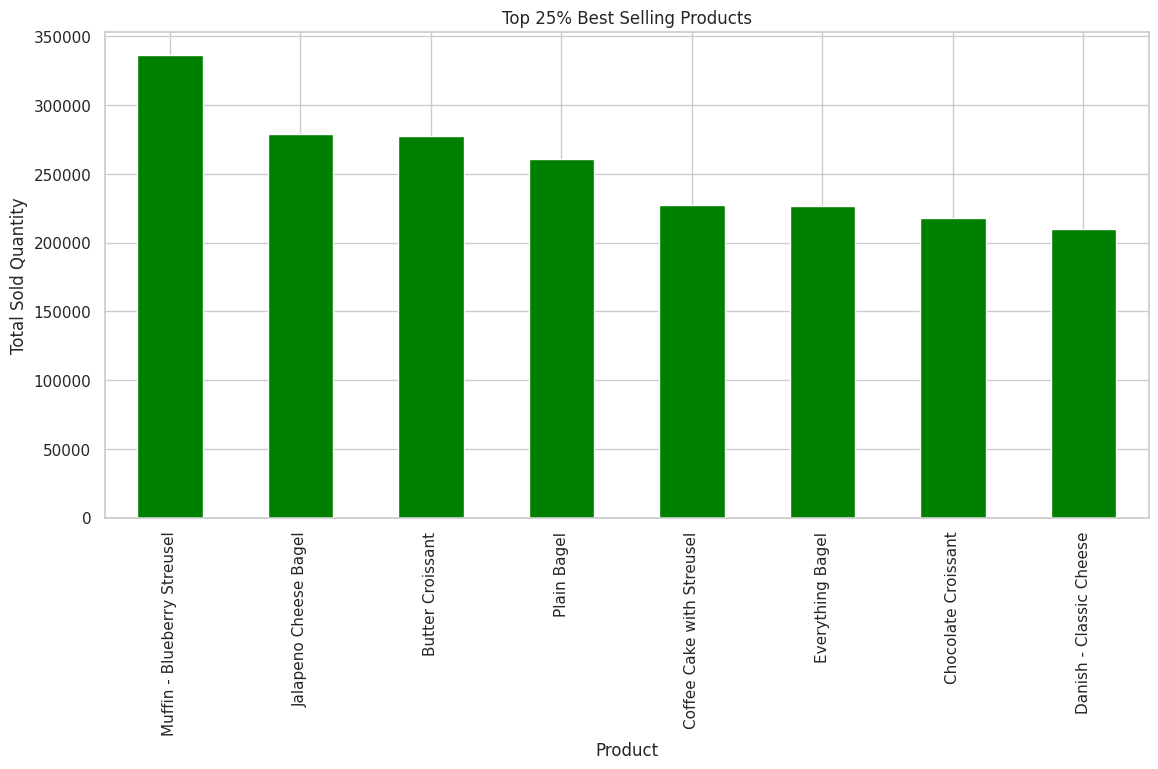

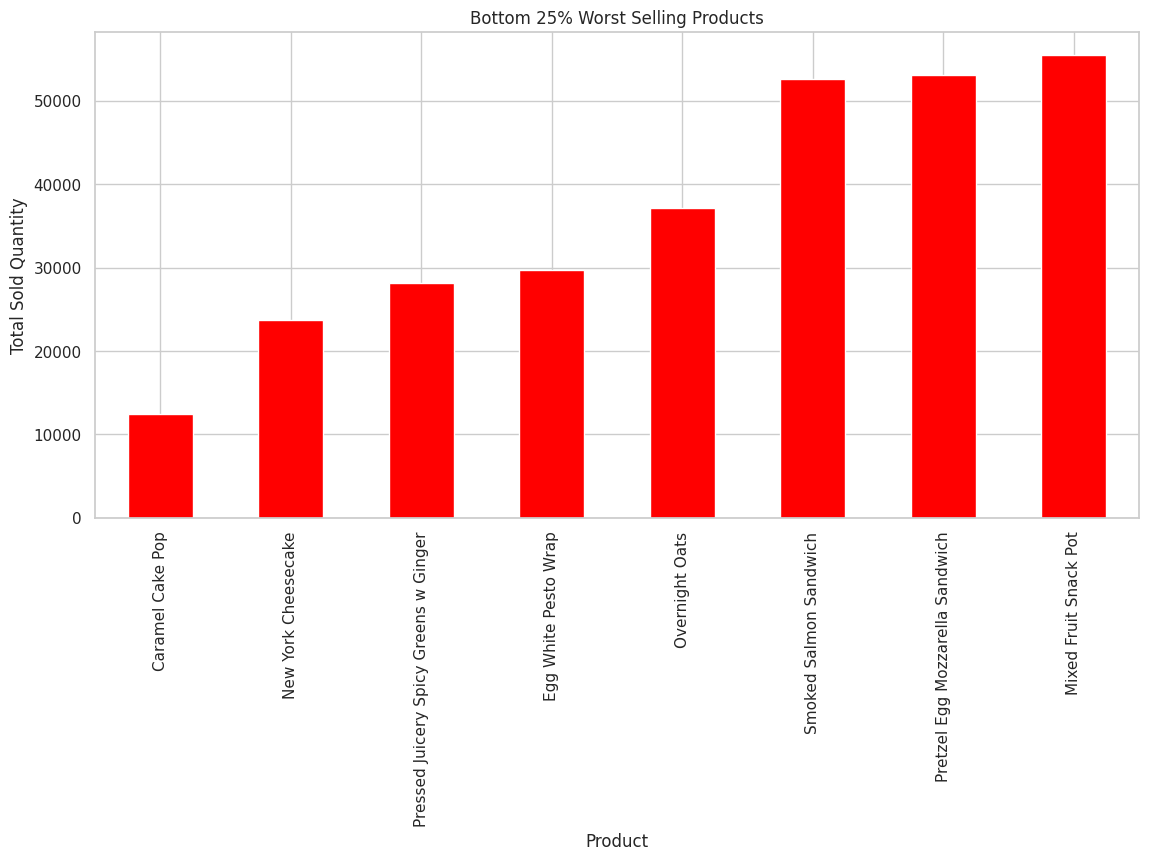

In [ ]:
total_sold = df.groupby('Description')['SoldQuantity'].sum()

# Determine the thresholds for top 25% and bottom 25%
top_25_threshold = total_sold.quantile(0.75)
bottom_25_threshold = total_sold.quantile(0.25)

# Identify top 25% and bottom 25% selling products
top_25_products = total_sold[total_sold >= top_25_threshold].sort_values(ascending=False)
bottom_25_products = total_sold[total_sold <= bottom_25_threshold].sort_values()

# Plotting the best and worst selling products
plt.figure(figsize=(12, 6))
top_25_products.plot(kind='bar', color='green')
plt.title('Top 25% Best Selling Products')
plt.ylabel('Total Sold Quantity')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
bottom_25_products.plot(kind='bar', color='red')
plt.title('Bottom 25% Worst Selling Products')
plt.ylabel('Total Sold Quantity')
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.show()

**Better Inventory Management leads to increse in the SALES of the product**

#**Impact of Weather on Sale And Wastage.**#
We have take the data of california from [this website.](https://www.visualcrossing.com/weather/weather-data-services#)

We firstly need to undserstand from when and upto when do is over data.

In [ ]:
df = pd.read_csv('Coffee_Stores_Data.csv')

# Assuming 'BusinessDate' is the name of the column containing the date information
# Checking the first and last date from the 'BusinessDate' column
first_date = df['BusinessDate'].min()
last_date = df['BusinessDate'].max()

first_date, last_date

('2019-06-29', '2020-06-29')

The data we got that starts from 06/29/2019 till 06/29/2020

We then import the weather data and calculate the wastage as = Recieved Quantity - (Sold Quantity + End Quantity)

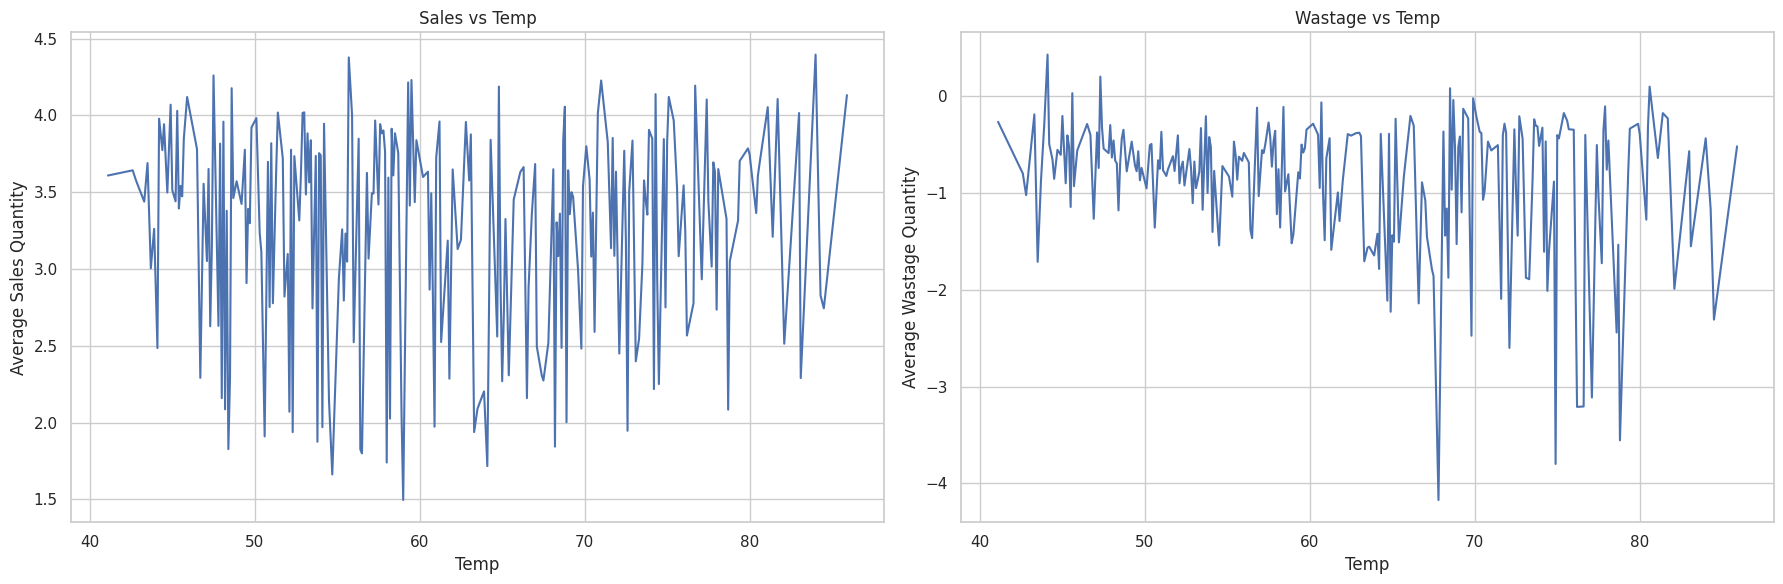

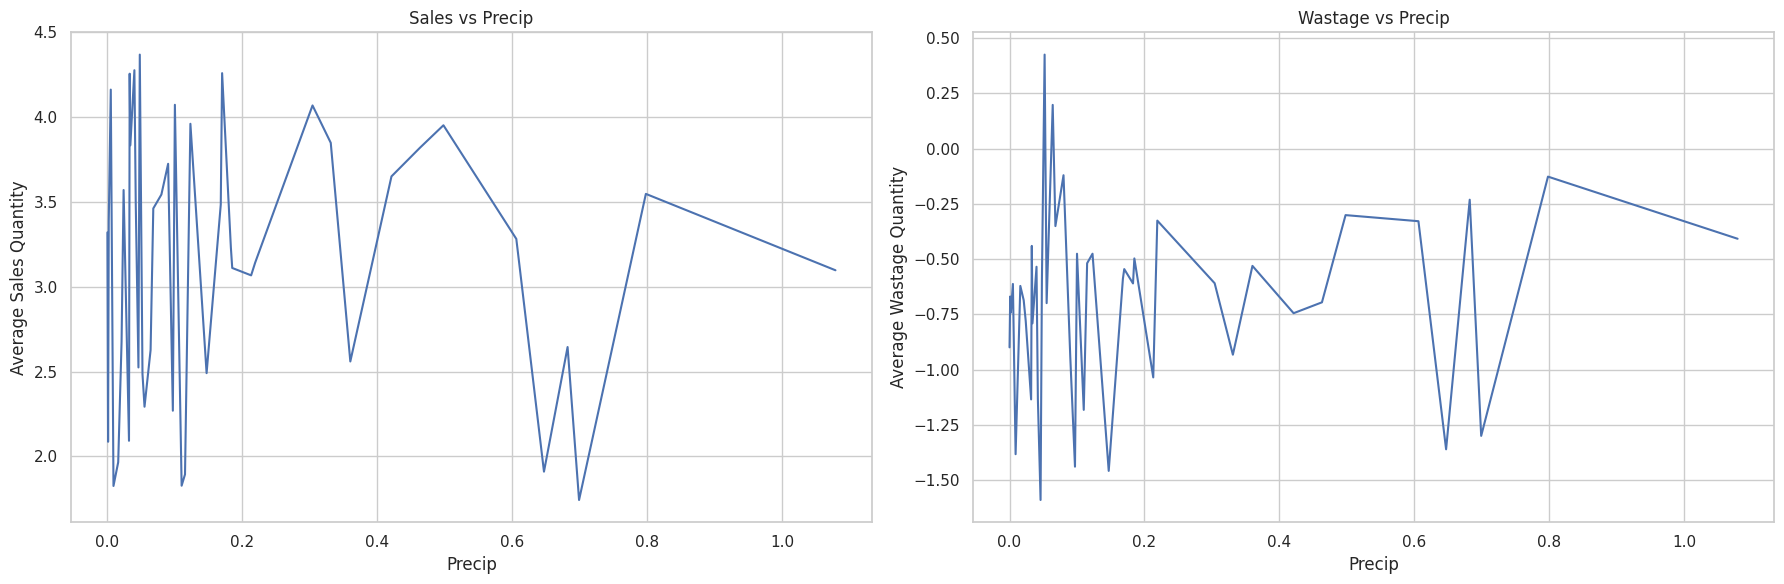

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the files into pandas dataframes
df_sales_inventory = pd.read_csv('Coffee_Stores_Data.csv')
df_weather = pd.read_csv('calif_temp.csv')

# Merging the sales/inventory data with the weather data based on the business date
df_merged = pd.merge(df_sales_inventory, df_weather, left_on='BusinessDate', right_on='datetime')

# Calculating Wastage
df_merged['Wastage'] = df_merged['ReceivedQuantity'] - (df_merged['SoldQuantity'] + df_merged['EndQuantity'])

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a function to plot line graphs for sales and wastage against weather parameters
def plot_weather_impact_line(data, weather_param, sales_param='SoldQuantity', waste_param='Wastage'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Aggregating data for line plot
    data_grouped = data.groupby(weather_param).mean().reset_index()

    # Plotting Sales vs Weather Parameter
    sns.lineplot(x=weather_param, y=sales_param, data=data_grouped, ax=axes[0])
    axes[0].set_title(f'Sales vs {weather_param.capitalize()}')
    axes[0].set_xlabel(weather_param.capitalize())
    axes[0].set_ylabel('Average Sales Quantity')

    # Plotting Wastage vs Weather Parameter
    sns.lineplot(x=weather_param, y=waste_param, data=data_grouped, ax=axes[1])
    axes[1].set_title(f'Wastage vs {weather_param.capitalize()}')
    axes[1].set_xlabel(weather_param.capitalize())
    axes[1].set_ylabel('Average Wastage Quantity')

    plt.tight_layout()
    return fig

# Plotting for temperature
plot_temp_line = plot_weather_impact_line(df_merged, 'temp')

# Plotting for precipitation
plot_precip_line = plot_weather_impact_line(df_merged, 'precip')

plt.show()


# The negative values in Wastage indicate that the end inventory is higher than what was initially recorded as received.
#Sales vs Temperature:
- We could infer that sales quantity might increase or decrease with temperature, suggesting a possible seasonal effect or preference for products based on temperature.

#Wastage vs Tempearture :
- Similar to the sales plot, the data does not show a discernible trend or correlation.
- It could indicate that wastage is affected by temperature, possibly due to spoilage rates of perishable goods or changes in consumer buying habits with the weather.

#For Precipitation
- There are some peaks and valleys, but without statistical analysis, it's uncertain whether these variations are significant or just random fluctuations.
It does not appear that precipitation has a straightforward impact on either sales or wastage. The variability in the data suggests that other factors might be at play, or that the impact of precipitation is not direct or is mitigated by other variables.
Both sales and wastage quantities show variability, but without a clear correlation to precipitation, it's challenging to draw any concrete conclusions about the weather's impact on these metrics.

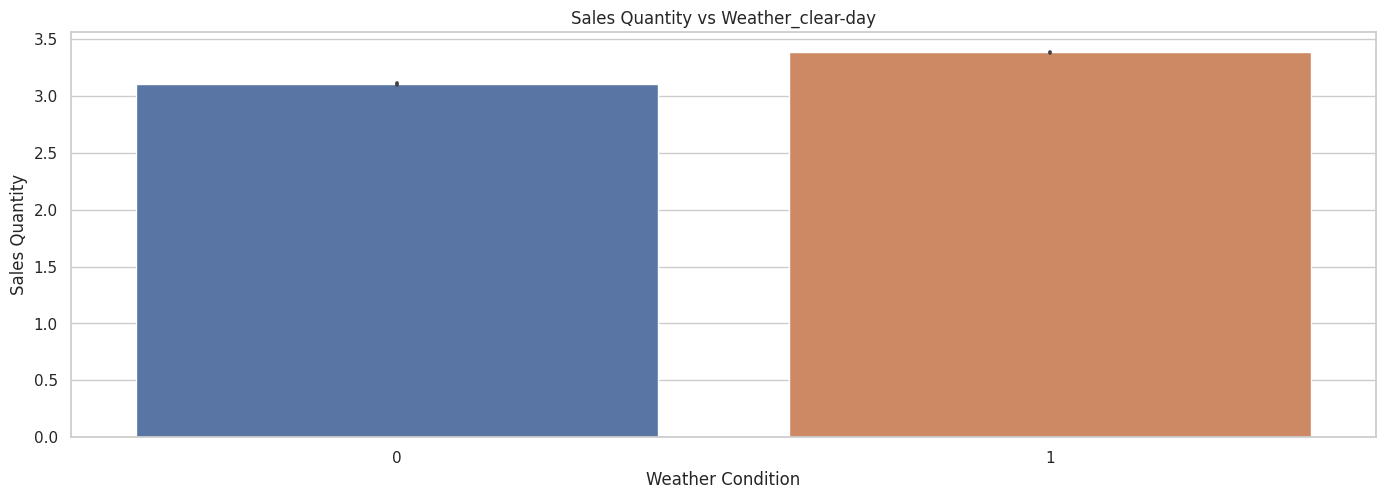

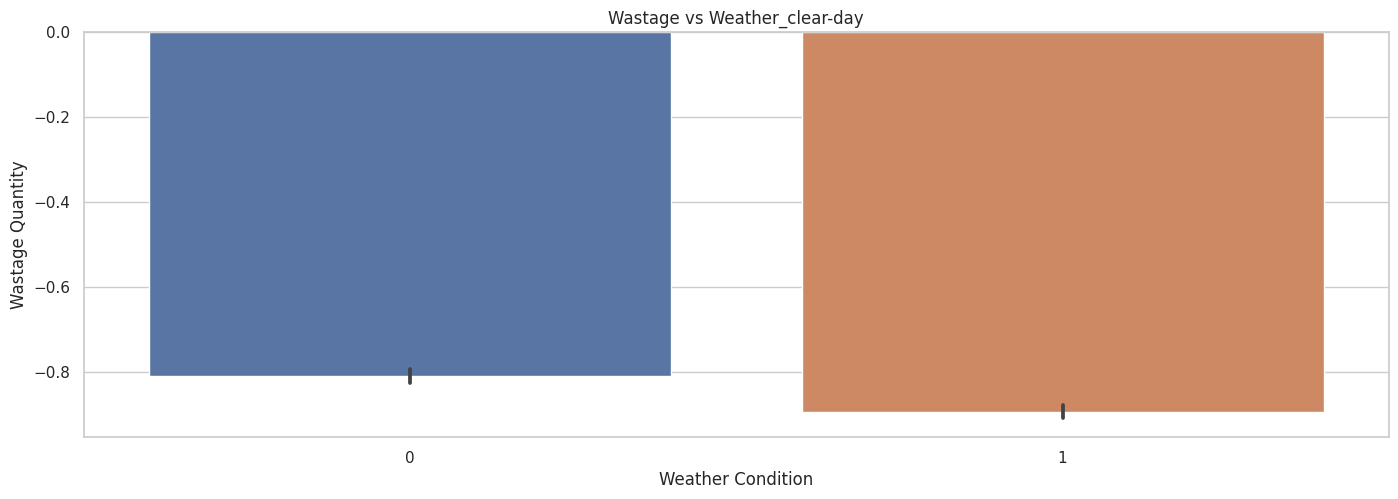

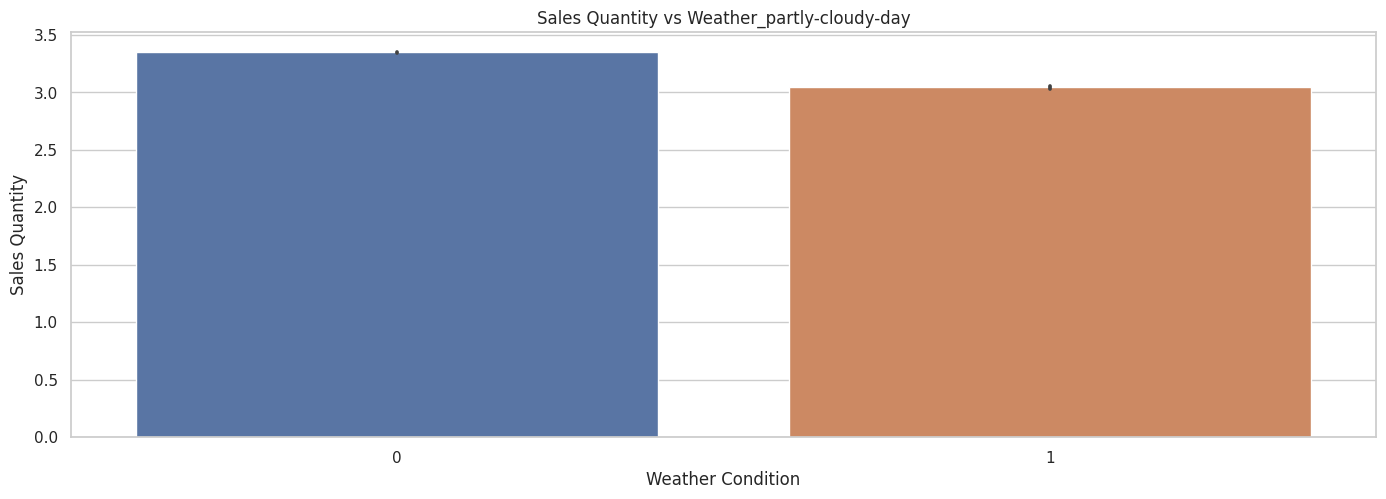

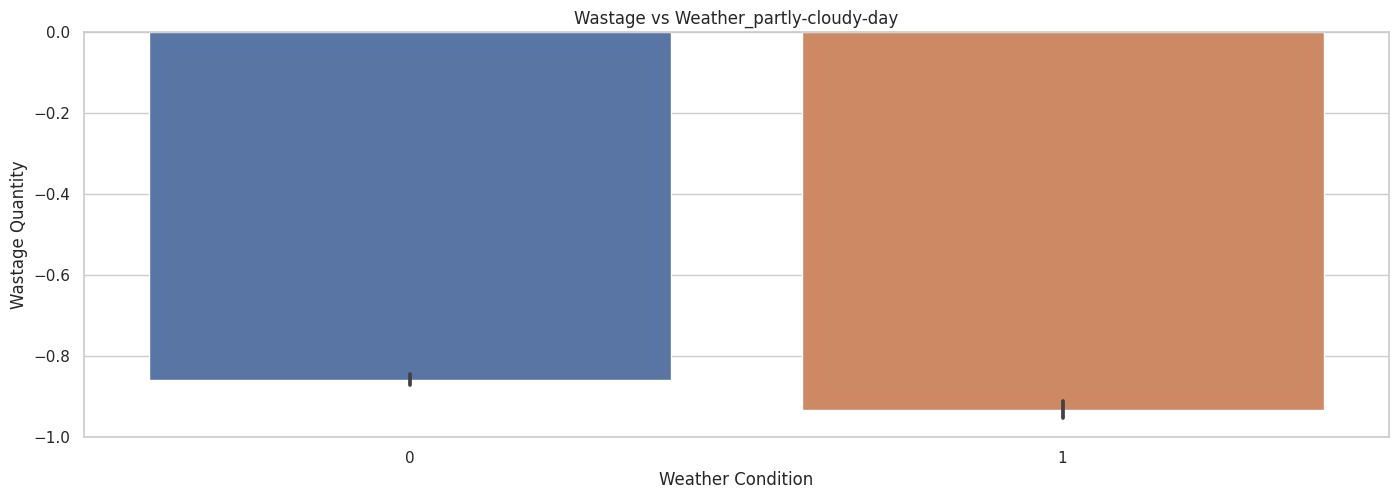

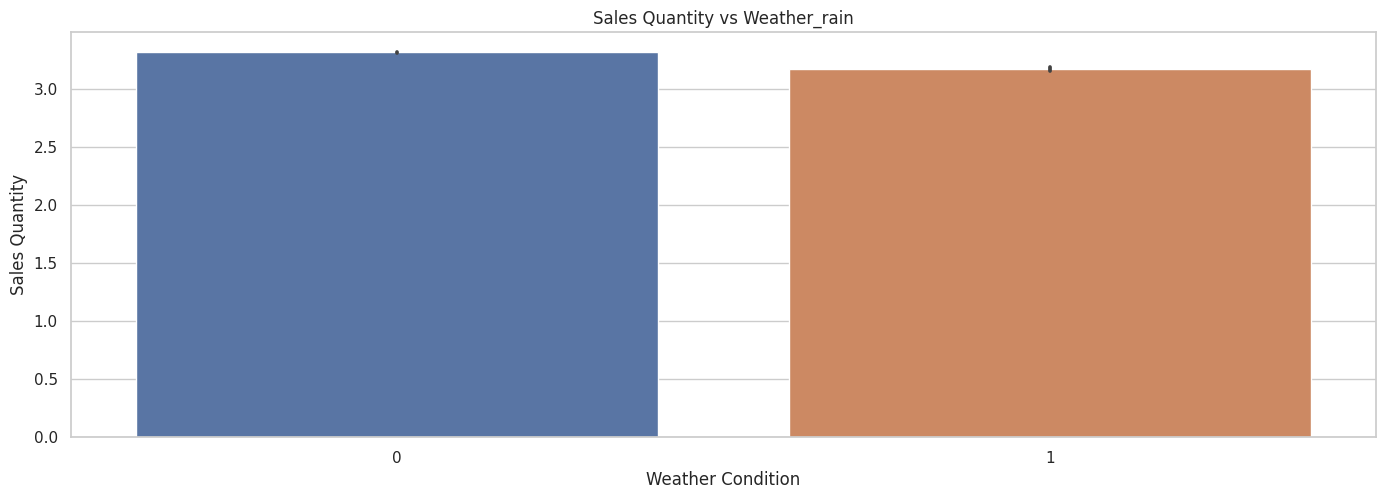

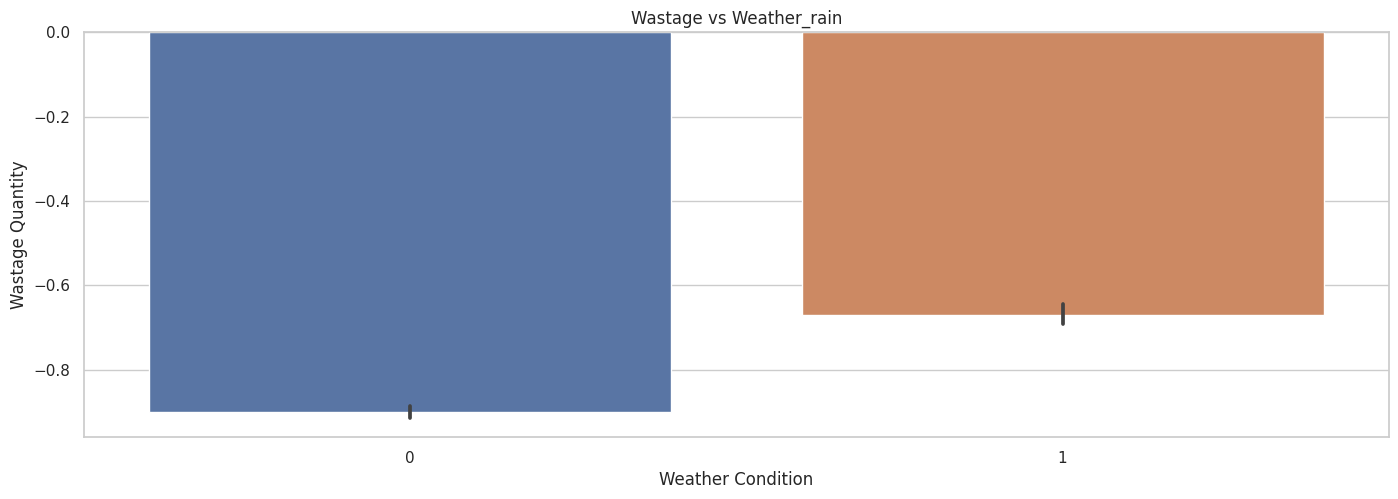

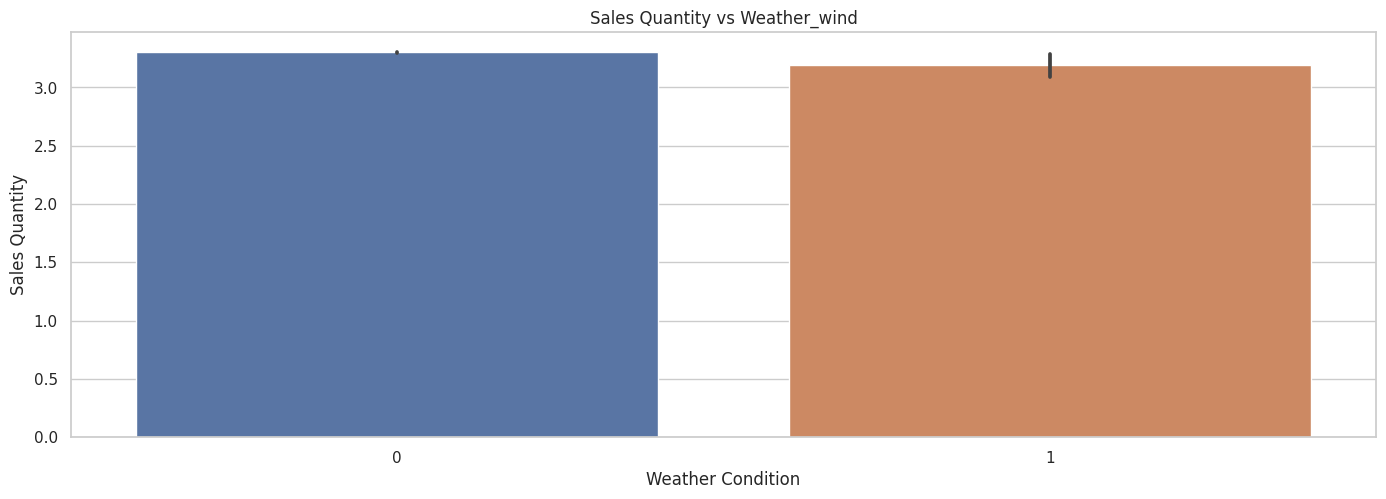

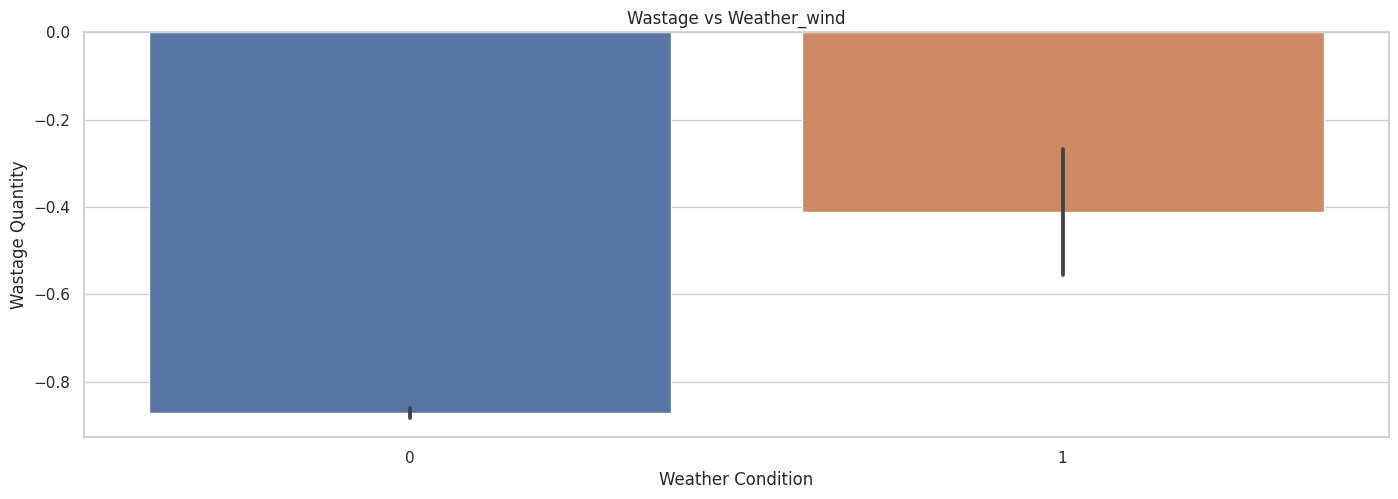

In [ ]:
df_weather = pd.read_csv('calif_temp.csv')
df_sales_inventory = pd.read_csv('Coffee_Stores_Data.csv')

# Assuming your weather data has a column 'icon' and a date column (e.g., 'datetime')
# Perform one-hot encoding on the 'icon' column
one_hot_encoded_data = pd.get_dummies(df_weather['icon'], prefix='Weather')

# Join the one-hot encoded columns back with the original DataFrame
df_weather_encoded = df_weather.join(one_hot_encoded_data)

# Merge the sales/inventory data with the weather data
# Replace 'BusinessDate' and 'datetime' with the actual date column names in your data
df_merged = pd.merge(df_sales_inventory, df_weather_encoded, left_on='BusinessDate', right_on='datetime')

# Calculating Wastage
df_merged['Wastage'] = df_merged['ReceivedQuantity'] - (df_merged['SoldQuantity'] + df_merged['EndQuantity'])

# Set the style for the plots
sns.set(style="whitegrid")

# Plotting
weather_conditions = ['Weather_clear-day', 'Weather_partly-cloudy-day', 'Weather_rain', 'Weather_wind']

for condition in weather_conditions:
    # Sales Quantity vs Weather Condition
    sns.barplot(x=condition, y='SoldQuantity', data=df_merged)
    plt.title(f'Sales Quantity vs {condition}')
    plt.ylabel('Sales Quantity')
    plt.xlabel('Weather Condition')
    plt.show()

    # Wastage vs Weather Condition
    sns.barplot(x=condition, y='Wastage', data=df_merged)
    plt.title(f'Wastage vs {condition}')
    plt.ylabel('Wastage Quantity')
    plt.xlabel('Weather Condition')
    plt.show()

#**Section 1 Part B**
# In this section, we have analysed the Sales for stores with IDs 18, 117 and 332

Before moving on to build models which is the more interesting part of the project, we will be going in an in-depth analysis of the data.
We have experienced setbacks when working on the dataset. We do not have certain features such as ZipCode, Drive Thru, Temperature and Weather features. This is because we cannot derive these features without knowing the geographical location of these stores.

One of the tasks in the project is to do an in-depth sales Analysis on three stores with Store IDs 18,117 and 332
Based on the information given to us regarding these three stores:
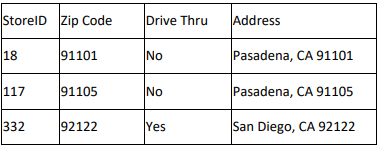

#We have added ```ZipCode```, ```DriveThru``` and ```Address``` feature for the Stores with IDs ```18, 117 ans 332``` and filled the values accordingly as given by the Table above

# Things that are not found in these stores

In [ ]:
import pandas as pd

# Load the CSV file
coffee_stores_data = pd.read_csv('Coffee_Stores_Data.csv')

# Extracting products for Store 18
store_18_products = set(coffee_stores_data[coffee_stores_data['StoreID'] == 332]['Description'])

# Extracting products for all other stores
other_stores_products = set(coffee_stores_data[coffee_stores_data['StoreID'] != 332]['Description'])

# Finding products not in Store 18
products_not_in_store_18 = other_stores_products.difference(store_18_products)

# Displaying the products
for product in sorted(products_not_in_store_18):
    print(product)

In [ ]:
import pandas as pd

# Load the CSV file
coffee_stores_data = pd.read_csv('Coffee_Stores_Data.csv')

# Extracting products for Store 18
store_18_products = set(coffee_stores_data[coffee_stores_data['StoreID'] == 117]['Description'])

# Extracting products for all other stores
other_stores_products = set(coffee_stores_data[coffee_stores_data['StoreID'] != 117]['Description'])

# Finding products not in Store 18
products_not_in_store_18 = other_stores_products.difference(store_18_products)

# Displaying the products
for product in sorted(products_not_in_store_18):
    print(product)


In [ ]:
import pandas as pd

# Load the CSV file
coffee_stores_data = pd.read_csv('Coffee_Stores_Data.csv')

# Extracting products for Store 18
store_18_products = set(coffee_stores_data[coffee_stores_data['StoreID'] == 18]['Description'])

# Extracting products for all other stores
other_stores_products = set(coffee_stores_data[coffee_stores_data['StoreID'] != 18]['Description'])

# Finding products not in Store 18
products_not_in_store_18 = other_stores_products.difference(store_18_products)

# Displaying the products
for product in sorted(products_not_in_store_18):
    print(product)

# ALl the products are present in ALL THE 3 STORES
# All three stores (Store IDs 18, 117, and 332) have approximately the same number of unique products, suggesting a standardized inventory across these locations.

In [ ]:
# List of StoreIDs you want to keep
desired_store_ids = [18, 117, 332]

# Extract rows with StoreIDs in the desired list
concentrated_df = df[df['StoreID'].isin(desired_store_ids)]
# Assume your DataFrame is named df and contains a column 'StoreID'

# Add ZipCode column
zipcode_mapping = {18: '91101', 117: '91105', 332: '92122'}
concentrated_df['ZipCode'] = concentrated_df['StoreID'].map(zipcode_mapping)

# Add DriveThru column
drivethru_mapping = {18: 'NO', 117: 'NO', 332: 'YES'}
concentrated_df['DriveThru'] = concentrated_df['StoreID'].map(drivethru_mapping)

# Add Address column
address_mapping = {18: 'PASADENA', 117: 'PASADENA', 332: 'SAN DIEGO'}
concentrated_df['Address'] = concentrated_df['StoreID'].map(address_mapping)

#dropping a column since it does not add value
concentrated_df.drop('CategoryLvl1Desc', axis=1, inplace=True)
#Dropping 'YearMonth' feature from the dataset as it is not necessary. We already have Year and Month feature
concentrated_df.drop('YearMonth', axis=1, inplace=True)

#Dropping the rows which contain NaN values
concentrated_df = concentrated_df.dropna()
# Display the resulting DataFrame
concentrated_df.head()

KeyError: ignored

In [ ]:
#After extracting the datapoints corresponding to the three stores, we get 30,863 observations. The number of Columns we have are 24
#From this execution of the cell, we see that we have 30863 rows (Data points) from these three stores
print('The shape of the Dataframe is: ',concentrated_df.shape)
unique_store_ids = concentrated_df['StoreID'].unique()
print('The Unique number of stores in the given dataframe are: ',unique_store_ids)
print('The Column Names for this Dataframe are: ',concentrated_df.columns)

The inventory efficiency was calculated using the following steps:

Unsold Inventory Cost Calculation: A new column, 'UnsoldInventoryCost,' was created by multiplying the 'EndQuantity' by 0.5. This represents the cost of unsold inventory.

Inventory Efficiency Calculation: The inventory efficiency was calculated as the ratio of 'SoldQuantity' to 'ReceivedQuantity.' This ratio indicates how well inventory is managed, with higher values suggesting better performance. To handle cases where 'ReceivedQuantity' is 0 (resulting in division by zero), any infinities in the 'InventoryEfficiency' column were replaced with NaN.

Handling NaN Values: Rows with NaN values in the 'InventoryEfficiency' column were dropped, as they correspond to cases where 'ReceivedQuantity' is 0.

Mean Inventory Efficiency per Product: The mean inventory efficiency for each product was calculated by grouping the data by 'Description' and taking the average of 'InventoryEfficiency.'

Identifying Top and Bottom 25% Products: Products were categorized into the top 25% and bottom 25% based on their mean inventory efficiency.

Visualization: Bar plots were created to visualize the distribution of inventory efficiency for the top and bottom 25% products.

Insights: The average unsold inventory cost was calculated for both the top and bottom 25% products, providing insights into the cost implications of inventory management.

The generated bar plots visually represent the efficiency distribution, allowing for a quick comparison of the inventory management performance for different products. Additionally, insights were derived by calculating the average unsold inventory cost for the identified product groups.

#CONCLUSION: It is very much evident that due to high inventory efficiency, we see high sales in products. This statement is verified when Blueberry Streusel which from earlier insight is the highest seling product also has the highest inventory efficiency

In [ ]:
data=concentrated_df
relevant_data = data[['Description', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity']]

# Adding a column for the cost of unsold inventory
relevant_data['UnsoldInventoryCost'] = relevant_data['EndQuantity'] * 0.5

# Calculating inventory efficiency as the ratio of SoldQuantity to ReceivedQuantity
# Higher values indicate better inventory management (more sales per item received)
relevant_data['InventoryEfficiency'] = relevant_data['SoldQuantity'] / relevant_data['ReceivedQuantity']
relevant_data['InventoryEfficiency'] = relevant_data['InventoryEfficiency'].replace(np.inf, np.nan)  # Replace infinities with NaN

# Dropping rows with NaN values in InventoryEfficiency (occurs when ReceivedQuantity is 0)
relevant_data = relevant_data.dropna(subset=['InventoryEfficiency'])

# Calculating the mean Inventory Efficiency for each product
product_efficiency = relevant_data.groupby('Description')['InventoryEfficiency'].mean()

# Identifying the top 25% and bottom 25% products based on Inventory Efficiency
top_25_percent = product_efficiency.nlargest(int(len(product_efficiency) * 0.25))
bottom_25_percent = product_efficiency.nsmallest(int(len(product_efficiency) * 0.25))

# Plotting the top and bottom 25% products
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Top 25%
sns.barplot(x=top_25_percent.values, y=top_25_percent.index, ax=axes[0])
axes[0].set_title('Top 25% Products Based on Inventory Efficiency')
axes[0].set_xlabel('Inventory Efficiency')

# Bottom 25%
sns.barplot(x=bottom_25_percent.values, y=bottom_25_percent.index, ax=axes[1])
axes[1].set_title('Bottom 25% Products Based on Inventory Efficiency')
axes[1].set_xlabel('Inventory Efficiency')

plt.tight_layout()
plt.show()

# Insights into Data
# Calculating average unsold inventory cost for top and bottom products
top_avg_unsold_cost = relevant_data[relevant_data['Description'].isin(top_25_percent.index)]['UnsoldInventoryCost'].mean()
bottom_avg_unsold_cost = relevant_data[relevant_data['Description'].isin(bottom_25_percent.index)]['UnsoldInventoryCost'].mean()

# Insights
insights = {
    "Top 25% Average Unsold Inventory Cost": top_avg_unsold_cost,
    "Bottom 25% Average Unsold Inventory Cost": bottom_avg_unsold_cost
}

insights

# Significance of the ```DriveThru``` feature in Increase of Sales
# In the section below we will be analyzing how the ```DriveThru``` feature is affecting sales in Stores with IDS ```18, 117 and 332```

## Driving through is an important feature. We observe store 332 with a drive-through feature has two-fold to three-fold more sales than stores 18 and 117 without this feature. This feature is obvious for a coffee store to attract consumers for a cup of coffee or treat. We also notice store 332 has better inventory management overall. When a store has a drive-through, sales are more robust and stable, it is easier to predict the inventory to stock up

In [ ]:

# Assuming your DataFrame is named 'concentrated_df'
# Filter the DataFrame for the year 2019 and specific StoreIds (18, 117, 332)
filtered_df_2019 = concentrated_df[((concentrated_df['Year'] == 2019) | (concentrated_df['Year'] == 2020))&
                                   (concentrated_df['StoreID'].isin([18, 117, 332]))]

# Group by 'StoreID' and sum the 'SoldQuantity'
grouped_df_2019 = filtered_df_2019.groupby('StoreID')['SoldQuantity'].sum().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StoreID', y='SoldQuantity', data=grouped_df_2019)

# Annotating the bars with their y-values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Aggregate SoldQuantity in 2019 and 2020 - StoreID 18, 117, 332')
plt.xlabel('StoreID')
plt.ylabel('Aggregate SoldQuantity')
plt.show()

#From the graph below we see that Store ```117``` has bad inventory management compared to the other two stores. As many customers ask for an item that is OUT of STOCK at this particular store. In the Subsequent graph we will take a deeper look into this behaviour.


In [ ]:
# For DataFrame is named 'concentrated_df'
# Filter the DataFrame for the years 2019 and 2020 and specific StoreIds (18, 117, 332)
filtered_df_2019_2020 = concentrated_df[(concentrated_df['Year'].isin([2019, 2020])) &
                                         (concentrated_df['StoreID'].isin([18, 117, 332]))]

# Group by 'StoreID' and sum the 'StockedOut'
grouped_df_StockedOut = filtered_df_2019_2020.groupby('StoreID')['StockedOut'].sum().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StoreID', y='StockedOut', data=grouped_df_StockedOut)

# Annotating the bars with their y-values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Aggregate StockedOut in 2019-2020 - StoreID 18, 117, 332')
plt.xlabel('StoreID')
plt.ylabel('Aggregate Wastage')
plt.show()

In [ ]:

# Calculating inventory efficiency as the ratio of SoldQuantity to ReceivedQuantity
# Higher values indicate better inventory management (more sales per item received)
concentrated_df['InventoryEfficiency'] = concentrated_df['SoldQuantity'] / concentrated_df['ReceivedQuantity']
concentrated_df['InventoryEfficiency'] = concentrated_df['InventoryEfficiency'].replace(np.inf, np.nan)  # Replace infinities with NaN

# Dropping rows with NaN values in InventoryEfficiency (occurs when ReceivedQuantity is 0)
concentrated_df =concentrated_df.dropna(subset=['InventoryEfficiency'])

In [ ]:

# Calculating inventory efficiency as the ratio of SoldQuantity to ReceivedQuantity
# Higher values indicate better inventory management (more sales per item received)
concentrated_df['InventoryInEfficiency'] = concentrated_df['StockedOut'] / concentrated_df['SoldQuantity']
concentrated_df['InventoryInEfficiency'] = concentrated_df['InventoryInEfficiency'].replace(np.inf, np.nan)  # Replace infinities with NaN

# Dropping rows with NaN values in InventoryEfficiency (occurs when ReceivedQuantity is 0)
concentrated_df =concentrated_df.dropna(subset=['InventoryInEfficiency'])

In [ ]:
# Assuming your DataFrame is named 'concentrated_df'
# Filter the DataFrame for the years 2019 and 2020 and specific StoreIds (18, 117, 332)
filtered_df_2019_2020 = concentrated_df[(concentrated_df['Year'].isin([2019, 2020])) &
                                         (concentrated_df['StoreID'].isin([18, 117, 332]))]

# Group by 'StoreID' and sum the 'Wastage'
grouped_df_wastage = filtered_df_2019_2020.groupby('StoreID')['InventoryEfficiency'].sum().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StoreID', y='InventoryEfficiency', data=grouped_df_wastage)

# Annotating the bars with their y-values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('InventoryEfficiency in 2019-2020 - StoreID 18, 117, 332')
plt.xlabel('StoreID')
plt.ylabel('Aggregate Wastage')
plt.show()

#So when stores have more stocked out items, it means they are inefficient in managing their inventory. As seen in store ID ```117```

In [ ]:
# Assuming your DataFrame is named 'concentrated_df'
# Filter the DataFrame for the years 2019 and 2020 and specific StoreIds (18, 117, 332)
filtered_df_2019_2020 = concentrated_df[(concentrated_df['Year'].isin([2019, 2020])) &
                                         (concentrated_df['StoreID'].isin([18, 117, 332]))]

# Group by 'StoreID' and sum the 'Wastage'
grouped_df_wastage = filtered_df_2019_2020.groupby('StoreID')['InventoryInEfficiency'].sum().reset_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='StoreID', y='InventoryInEfficiency', data=grouped_df_wastage)

# Annotating the bars with their y-values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Inventory Inefficiency in 2019-2020 - StoreID 18, 117, 332')
plt.xlabel('StoreID')
plt.ylabel('Aggregate Wastage')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV file
specific_stores_data = pd.read_csv('specific_stores.csv')  # Make sure the file path is correct

# Aggregating sold quantities for 'YES' and 'NO' drive-through separately
aggregate_drive_thru_yes = specific_stores_data[specific_stores_data['DriveThru'] == 'YES'] \
                            .groupby('Description')['SoldQuantity'].sum()
aggregate_drive_thru_no = specific_stores_data[specific_stores_data['DriveThru'] == 'NO'] \
                           .groupby('Description')['SoldQuantity'].sum()

# Creating a combined DataFrame
combined_aggregate = pd.DataFrame({
    'Yes': aggregate_drive_thru_yes,
    'No': aggregate_drive_thru_no
}).fillna(0)  # Fill NaN with 0 for products not available in one of the categories

# Reset index to have 'Description' as a column instead of an index
combined_aggregate_full = combined_aggregate.reset_index()

# Display the full DataFrame
print(combined_aggregate_full)


                                    Description     Yes      No
0                              Almond Croissant  2140.0  2488.0
1                               Blueberry Scone  1481.0  2683.0
2            Breakfast Burrito Egg Beans & Rice  1139.0   683.0
3                              Butter Croissant  2760.0  3342.0
4                              Caprese Sandwich  1709.0   921.0
5                              Caramel Cake Pop    14.0     1.0
6                           Chocolate Croissant  2348.0  2775.0
7                                 Cinnamon Roll  2225.0  2331.0
8                     Coffee Cake with Streusel  2780.0  1967.0
9                      Cookie - Chocolate Chunk   790.0   776.0
10           Croissant - White Cheddar Jalapeno  1839.0  1806.0
11                      Danish - Classic Cheese  1802.0  2502.0
12                         Egg White Pesto Wrap   518.0   205.0
13  Egg| Spinach & Cheddar Sandwich on Ciabatta  2304.0  1192.0
14                             Everythin

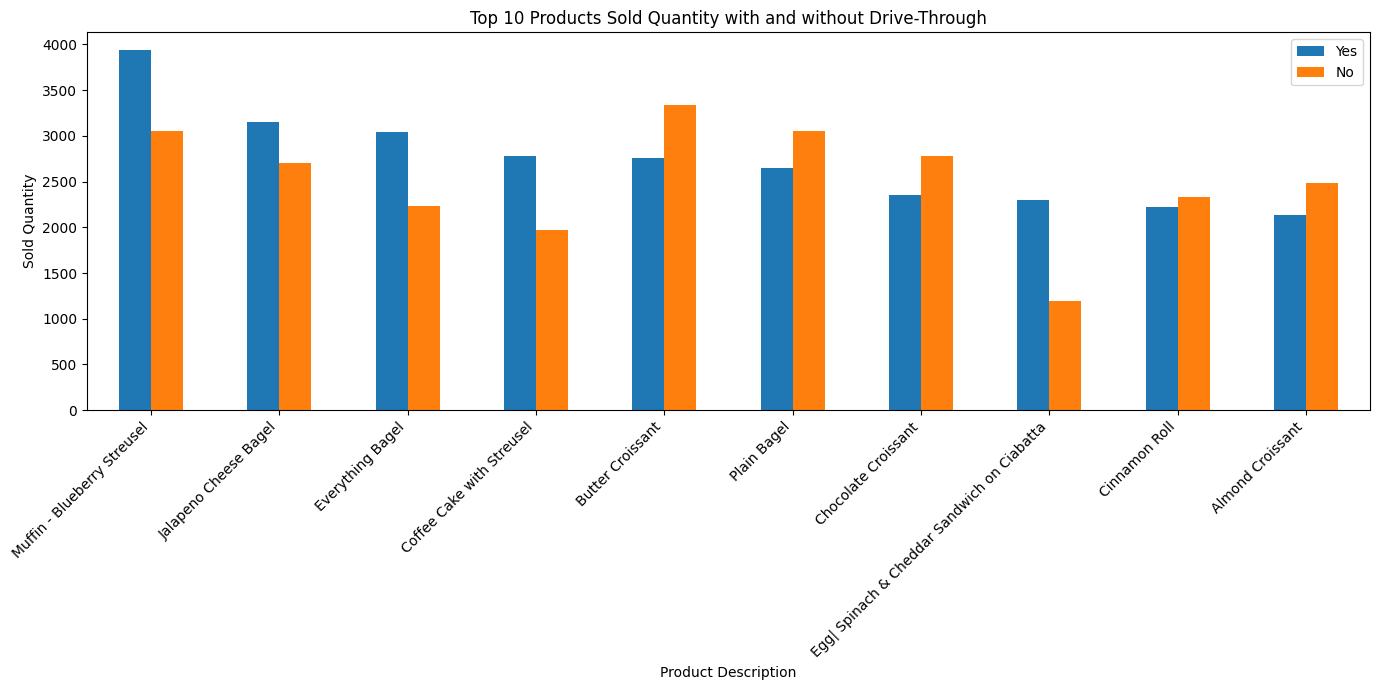

In [ ]:
# Since the DataFrame is quite large, we will visualize only the top 10 products for clarity
top_products = combined_aggregate_full.sort_values(by='Yes', ascending=False).head(10)

# Setting the index to 'Description' to use it as labels on the x-axis
top_products.set_index('Description', inplace=True)

# Plotting the data
top_products.plot(kind='bar', figsize=(14, 7))

# Adding titles and labels
plt.title('Top 10 Products Sold Quantity with and without Drive-Through')
plt.xlabel('Product Description')
plt.ylabel('Sold Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Display the plot
plt.show()

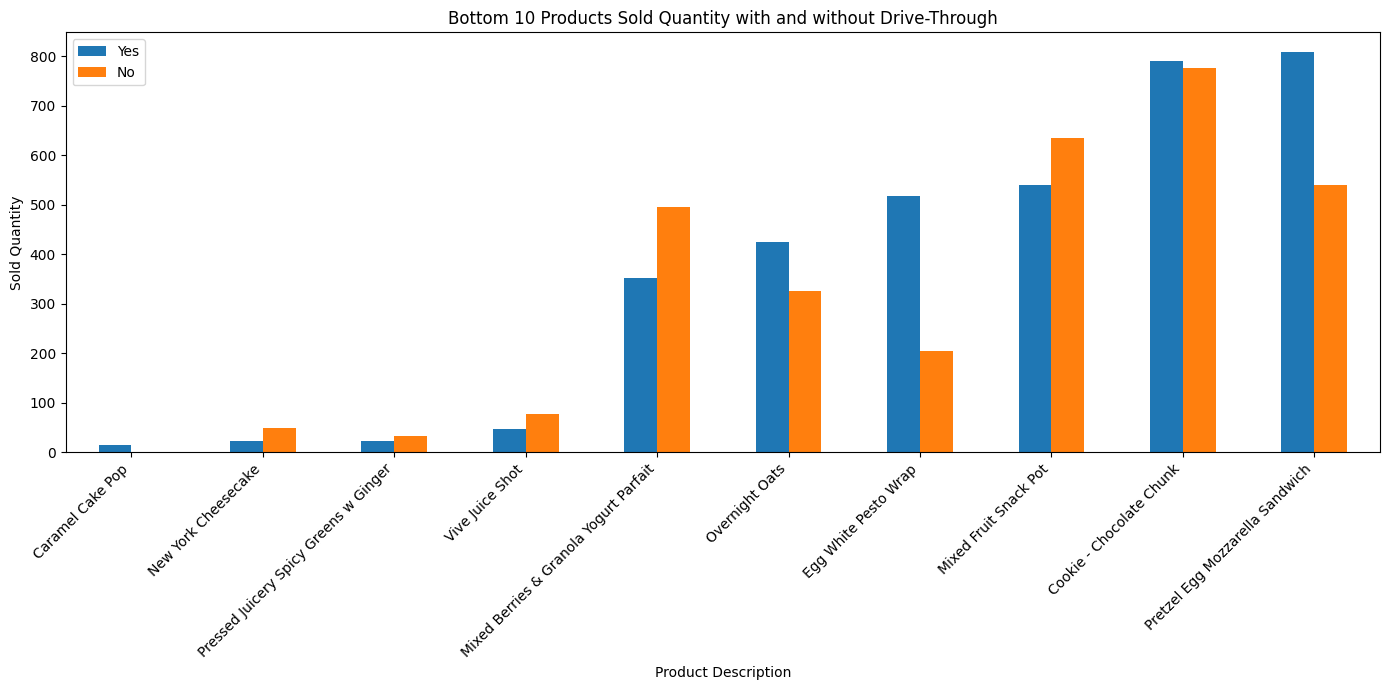

In [ ]:
# Since the DataFrame is quite large, we will visualize only the bottom 10 products for clarity
bottom_products = combined_aggregate_full.sort_values(by='Yes', ascending=True).head(10)

# Setting the index to 'Description' to use it as labels on the x-axis
bottom_products.set_index('Description', inplace=True)

# Plotting the data
bottom_products.plot(kind='bar', figsize=(14, 7))

# Adding titles and labels
plt.title('Bottom 10 Products Sold Quantity with and without Drive-Through')
plt.xlabel('Product Description')
plt.ylabel('Sold Quantity')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

# We can see that the sales of each product overall increase due to the drive through feature.
- It can be recommeded to all stores and this feature must be applied to store that has poor sale.
- It suggest the people visiting the coffee prefer to drive than walk to the store.